# Kelompok : 3

# Project : Diamond Price Prediction

## 1. Business Understanding
- Adapun proyek ini membahas mengenai bagaimana memprediksi harga diamond dengan menggunakan dataset berasal dari kaggle.

- Informasi dataset sebagai berikut:

| Jenis | Keterangan |
| ------ | ------ |
| Title | Data Analysis on Diamonds Dataset |
| Source | [Kaggle](https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond) |
| Maintainer | [Swati Khedekar ⚡](https://www.kaggle.com/swatikhedekar) |
| License | Other (specified in description) |
| Visibility | Publik |
| Tags | Religion and Belief System, Beginner, Pandas, Matplotlib, Data Visualization, Regression, Exploratory Data Analysis_ |
| Usability | 10.00 |

## 2. Data Understading
- Pada tahap ini dilakukan eksplorasi data (Exploratory Data Analysis/EDA) untuk memahami struktur dan karakteristik dataset.

- Analisis mencakup identifikasi variabel yang tersedia, pengecekan nilai yang hilang (missing values), pendeteksian data duplikat, pencarian outlier, serta analisis hubungan secara univariat (satu variabel) dan multivariat (antar variabel).

- Langkah-langkah ini penting untuk memastikan kualitas data dan memahami pola awal sebelum masuk ke tahap pemodelan.

### Import Library dan Package

In [1]:
# Library umum
import math
import warnings
import kagglehub
import random
import itertools
warnings.filterwarnings('ignore')

# Library analisis dan visualisasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Library Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

### Data Loading

In [2]:
path = kagglehub.dataset_download("swatikhedekar/price-prediction-of-diamond")
print("Path to dataset files:", path)

diamonds_df = pd.read_csv(path + "/diamonds.csv")
diamonds_df

100%|██████████| 733k/733k [00:00<00:00, 19.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/swatikhedekar/price-prediction-of-diamond/versions/3


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### 2.1 EDA - Deskripsi Variabel

In [3]:
# Cek kolom/variabel datanya
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
pd.DataFrame({'Kolom':diamonds_df.columns,
              'Tipe Data':diamonds_df.dtypes,
              'Jumlah Data Non-Null':diamonds_df.count(),
              'Jumlah Data Unik':diamonds_df.nunique(),
              'Contoh Data Unik':diamonds_df.apply(lambda x:', '.join(map(str, x.unique()[:8])))
            }).reset_index(drop=True)

,Kolom,Tipe Data,Jumlah Data Non-Null,Jumlah Data Unik,Contoh Data Unik
0,Unnamed: 0,int64,53940,53940,"1, 2, 3, 4, 5, 6, 7, 8"
1,carat,float64,53940,273,"0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3"
2,cut,object,53940,5,"Ideal, Premium, Good, Very Good, Fair"
3,color,object,53940,7,"E, I, J, H, F, G, D"
4,clarity,object,53940,8,"SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF"
5,depth,float64,53940,184,"61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9"
6,table,float64,53940,127,"55.0, 61.0, 65.0, 58.0, 57.0, 56.0, 54.0, 62.0"
7,price,int64,53940,11602,"326, 327, 334, 335, 336, 337, 338, 339"
8,x,float64,53940,554,"3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 4.07, 3.87"
9,y,float64,53940,552,"3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 4.11, 3.78"


- Insight:
  - Dari Hasil EDA dengan melihat variabel dan karateristiknya maka beberapa insight yang ditemukan:

1. **Penjelasan per Kolom** dijelaskan dibawah:
  - price: Harga berlian dalam dolar Amerika Serikat ($), yang merupakan label dalam analisis ini.

  - carat: Bobot berlian dalam satuan carat, yang digunakan sebagai ukuran dari batu permata dan perhiasan.

  - cut: Kualitas pemotongan berlian, yang memengaruhi bagaimana cahaya dipantulkan dari berlian tersebut. Kualitas cut dibagi dalam 5 kategori: Fair, Good, Very Good, Premium, dan Ideal, dengan Ideal sebagai yang terbaik dan Fair sebagai yang terendah.

  - color: Warna berlian, yang diukur dalam skala dari D (warna terbaik, sangat jernih) hingga J (paling buruk). Semakin dekat ke D, semakin tinggi kualitas berlian tersebut.

  - clarity: Tingkat kejernihan berlian diukur berdasarkan jumlah dan jenis inklusi (cacat) yang ada di dalamnya. Kategori kejernihan berlian dari yang terburuk hingga terbaik adalah sebagai berikut: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF (terbaik).

  - x: Panjang berlian dalam satuan milimeter (mm).

  - y: Lebar berlian dalam satuan milimeter (mm).

  - z: Kedalaman berlian dalam satuan milimeter (mm).

  - depth: Rasio kedalaman berlian yang dihitung sebagai 2 * z / (x + y).

  - table: Lebar bagian atas berlian relatif terhadap titik terlebar. Rasio ini memengaruhi pencahayaan dan efek visual berlian.                                                               |

  - Sebagai referensi untuk pemahaman lebih lanjut mengenai kualitas berlian dan klasifikasinya, dapat dilihat pada sumber [ggplot2 Tidyverse Diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html), yang memberikan deskripsi lengkap mengenai karakteristik berlian serta standar kualitas seperti cut, color, dan clarity.

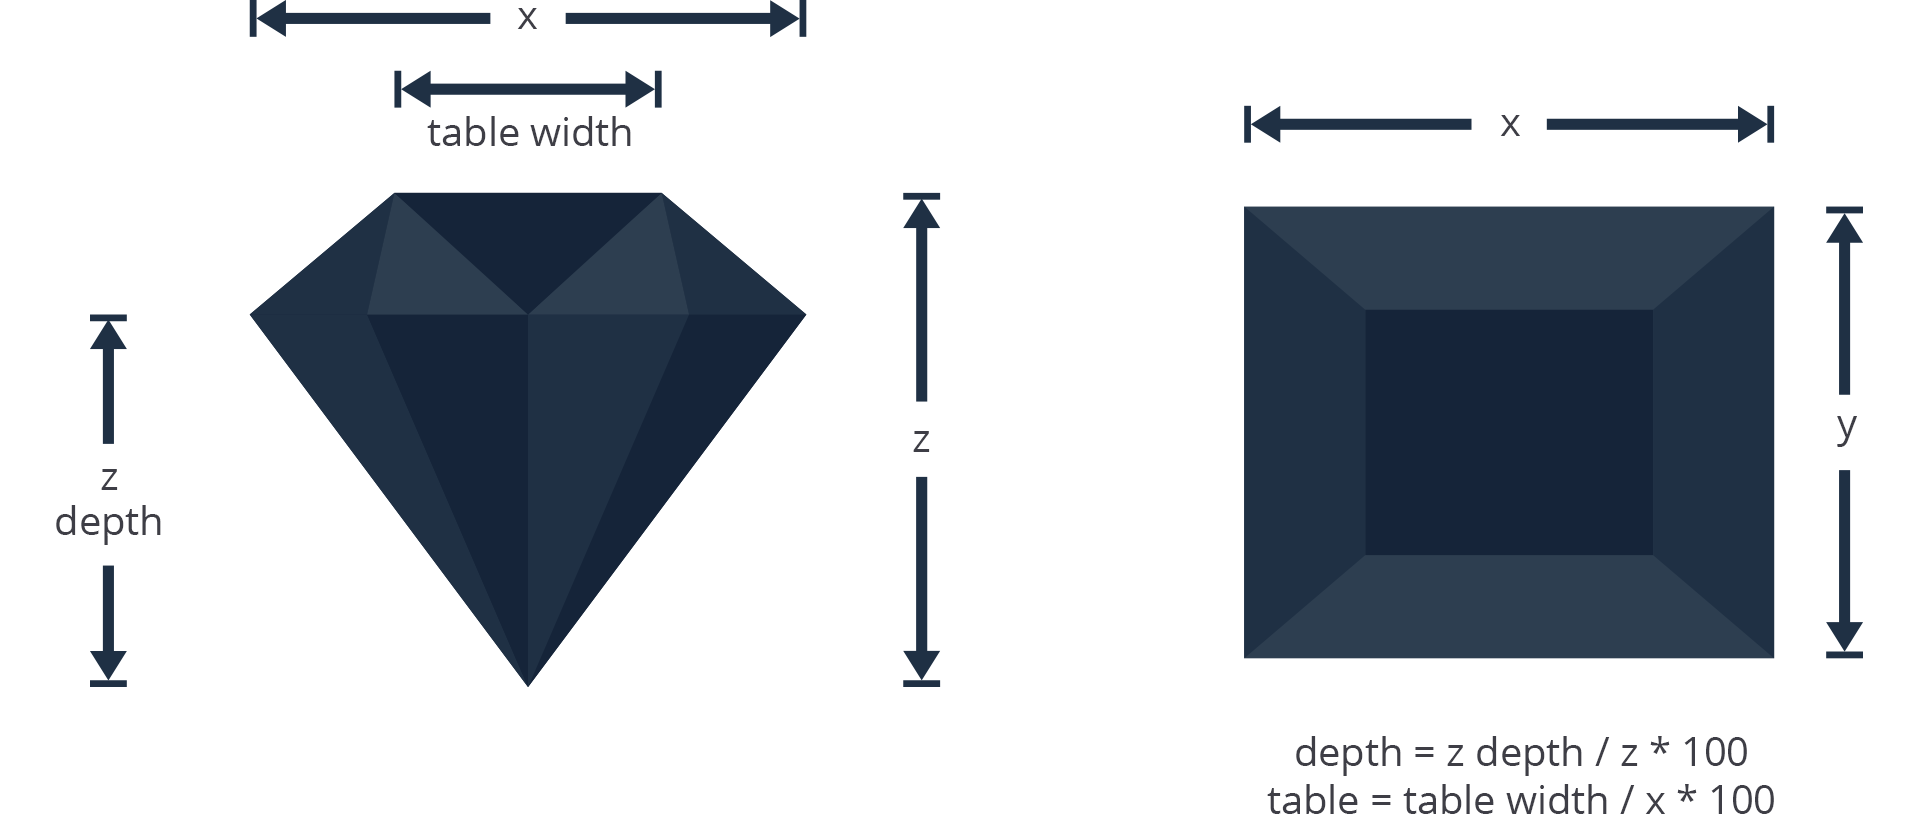

2. **Unnamed: 0**: Kolom ini tampaknya hanya berfungsi sebagai index yang tidak memiliki informasi berguna untuk analisis atau pemodelan. Oleh karena itu, **kolom ini harus dihapus**.

3. Terdapat **53.940 baris** dengan **10 kolom** dimana **3 kolom bertipe object (kategorikal)**, yaitu cut, color, dan clarity. Sedangkan **kolom numerik (kontinu) terdiri dari 7 kolom**, yaitu carat, depth, table, price, x, y, dan z.

In [5]:
# Menghapus kolom unnamed 0
diamonds_df_eda = diamonds_df.drop(columns='Unnamed: 0')

In [6]:
# Cek informasi statistik dari dataset
diamonds_df_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


- Insight:
  - Ditemukan kejanggalan pada kolom x, y, dan z, di mana terdapat nilai minimum sebesar 0.
  - Nilai 0 pada panjang, lebar, dan kedalaman berlian mustahil ada karena ukuran fisik berlian tidak mungkin nol.
  - Kemungkinan besar, nilai 0 tersebut merupakan representasi dari data yang hilang (missing value) yang disamarkan.

### 2.2 EDA - Menangani Missing Values

In [7]:
# Ubah nilai nol di kolom x, y, dan z

diamonds_df_eda['x'].replace({0:np.nan}, inplace=True)
diamonds_df_eda['y'].replace({0:np.nan}, inplace=True)
diamonds_df_eda['z'].replace({0:np.nan}, inplace=True)

In [8]:
# Cek nilai missing
diamonds_df_eda.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,8
y,7
z,20


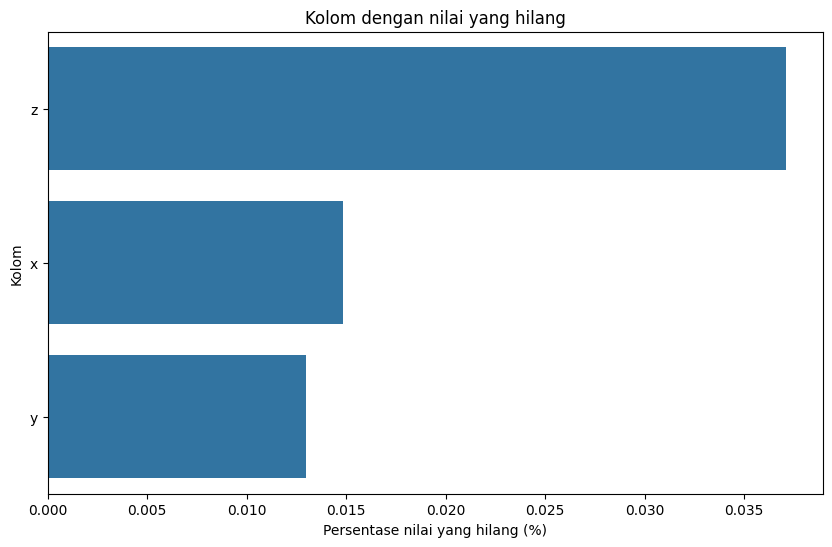

In [9]:
missing_percentage_df = diamonds_df_eda.isnull().sum()/len(diamonds_df_eda) * 100
missing_percentage_df = missing_percentage_df[missing_percentage_df > 0].sort_values(ascending=False)


# Visualisasi data dengan barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=missing_percentage_df.values, y=missing_percentage_df.index)

plt.xlabel('Persentase nilai yang hilang (%)')
plt.ylabel('Kolom')
plt.title('Kolom dengan nilai yang hilang')
plt.show()

- Insight:
  - Ditemukan nilai missing (null) pada kolom x sebanyak 8 data, y sebanyak 7 data, dan z sebanyak 20 data.
  - Jumlah missing tersebut tergolong sangat kecil dibandingkan total data sebanyak 53.940 baris.
  - Oleh karena itu, menghapus baris yang mengandung missing value dianggap sebagai solusi yang wajar dan tidak berdampak signifikan terhadap keseluruhan data.

In [10]:
# Menghapus Nilai yang missing
diamonds_df_eda = diamonds_df_eda.dropna()

### 2.3 EDA - Menangani Data Duplikat

In [11]:
print(f'Jumlah data duplikat yang ditemukan : {diamonds_df_eda.duplicated().sum()}')

Jumlah data duplikat yang ditemukan : 145


- Insight:
  - Dari hasil pengecekan tidak ditemukan data yang duplikat dari data ini.

In [12]:
# Menghapus data duplikat
diamonds_df_eda = diamonds_df_eda.drop_duplicates()

### 2.4 EDA - Menangani Outlier

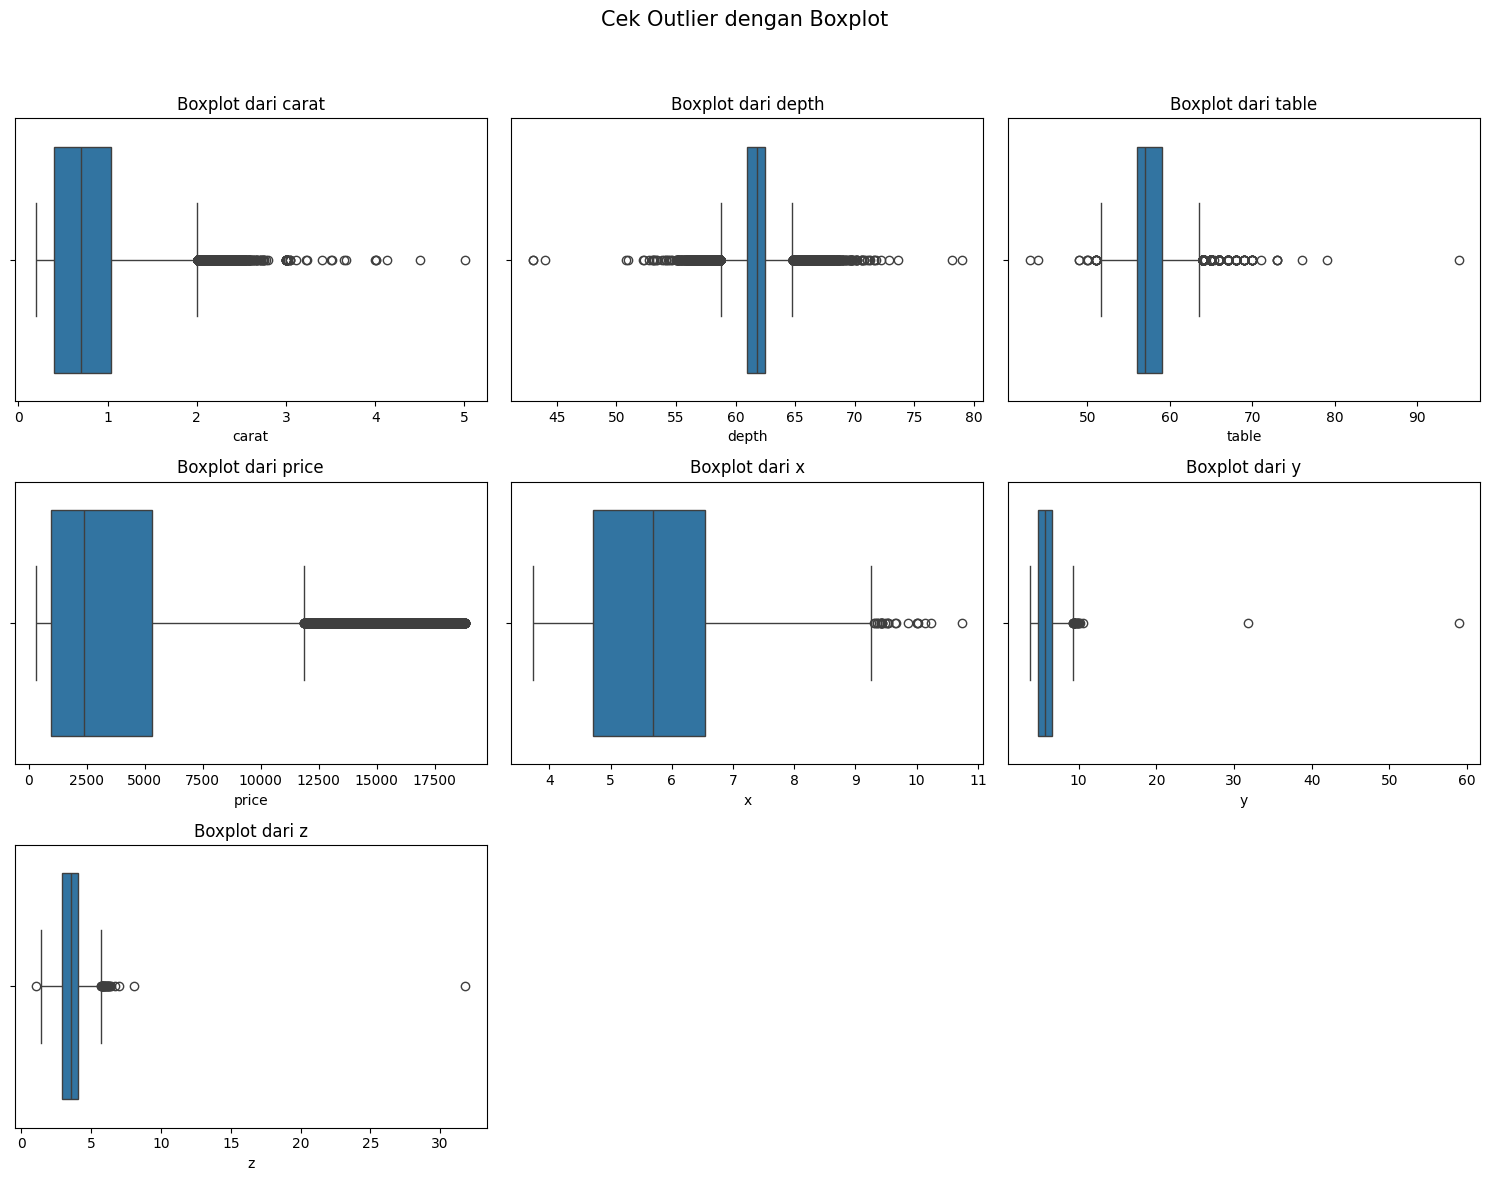

In [13]:
# Membuat visualisasi (boxplot) untuk melihat outlier dari masing-masing data

## 1. Untuk melihat outlier ambil fitur bertipe numerik
diamonds_df_eda_num = diamonds_df_eda.select_dtypes(include='number')

## 2. Mempersiapkan data
max_col = 3
max_row = math.ceil(len(diamonds_df_eda_num.columns)/max_col)

## 3. Membuat plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(diamonds_df_eda_num.columns):
  plt.subplot(max_row, max_col, i+1)
  sns.boxplot(data = diamonds_df_eda_num, x=col)
  plt.title(f'Boxplot dari {col}')

## 4. Menampilkan plot
plt.suptitle('Cek Outlier dengan Boxplot', size=15)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

- Insight:
  - Berdasarkan grafik boxplot yang ditampilkan terlihat bahwa setiap fitur numerik memiliki outlier.
  - Outlier ini dapat ditangani dengan cara menghapusnya.

In [14]:
# Menghapus Outlier
num_feature = diamonds_df_eda.select_dtypes(include='number')

## 1. Menentukan IQR
Q1 = num_feature.quantile(q=0.25)
Q3 = num_feature.quantile(q=0.75)
IQR = Q3-Q1

## 2. Menentukan Batas Bawah dan Batas Atas
BB = Q1 - (IQR * 1.5)
BA = Q3 + (IQR * 1.5)

## 3. Cek dan hapus outlier
mask_outlier = ((num_feature < BB) | (num_feature > BA)).any(axis=1)
clean_index = num_feature.index[~mask_outlier]
diamonds_df_eda = diamonds_df_eda.loc[clean_index]

In [15]:
print(f'Jumlah baris dan kolom sebelum penanganan adalah {diamonds_df.shape}')
print(f'Jumlah baris dan kolom setelah penanganan adalah {diamonds_df_eda.shape}')

Jumlah baris dan kolom sebelum penanganan adalah (53940, 11)
Jumlah baris dan kolom setelah penanganan adalah (47412, 10)


### 2.5 EDA - Univariate Analysis

#### 2.5.1 Catagorical Features
- Pada tahapan ini, akan dibuat barplot untuk melihat distribusi jumlah data berdasarkan kategori pada setiap fitur.

In [16]:
def categorical_check(df, col):
  count = df[col].value_counts()
  percentage = 100 * df[col].value_counts(normalize=True)
  col_df = pd.DataFrame({'Jumlah Sampel' : count, 'persentase' : percentage.round(1)})
  col_df['persentase'] = col_df['persentase'].astype('str') + '%'

  plt.figure(figsize=(10,6))
  palette = ['pastel', 'muted', 'deep', 'bright', 'dark', 'Set2', 'colorblind']
  ax = sns.barplot(x=col_df.index, y=col_df['Jumlah Sampel'], palette=random.choice(palette))
  for i,v in enumerate(col_df['Jumlah Sampel']):
    ax.text(i, v, str(v), ha='center', va='bottom')
  plt.xlabel(col)
  plt.ylabel('Jumlah Sampel')
  plt.title(f'Barplot dari {col}')
  plt.show

  return col_df

,Jumlah Sampel,persentase
cut,,
Ideal,20278,42.8%
Premium,12081,25.5%
Very Good,10984,23.2%
Good,3739,7.9%
Fair,330,0.7%


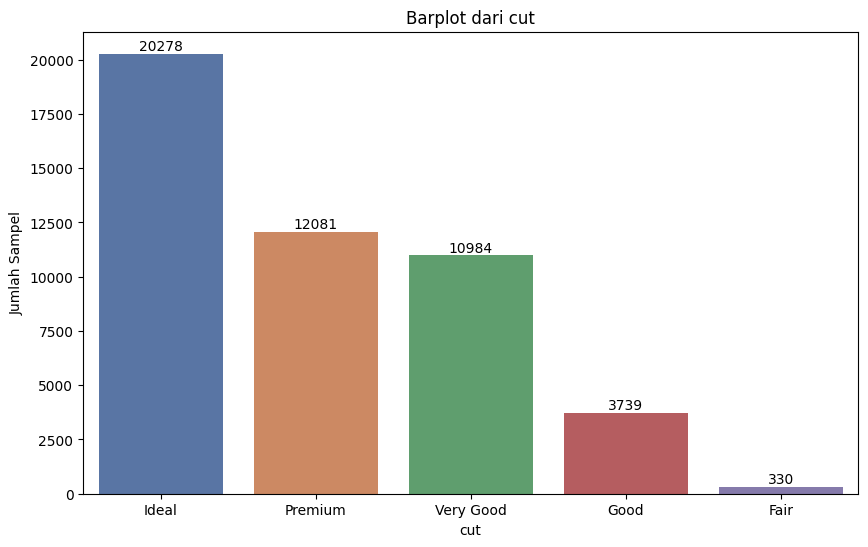

In [17]:
categorical_check(diamonds_df_eda , 'cut')

- Insight:
  - Berdasarkan visualisasi, mayoritas cut dari diamond berada pada kategori yang baik, yaitu Ideal dan Premium, yang secara keseluruhan mencakup sekitar 65% dari total data.

  - Sementara itu, cut dengan kualitas terendah yaitu Fair, hanya mencakup sekitar 1% dari keseluruhan sampel.

,Jumlah Sampel,persentase
color,,
G,10056,21.2%
E,8893,18.8%
F,8450,17.8%
H,7154,15.1%
D,6175,13.0%
I,4455,9.4%
J,2229,4.7%


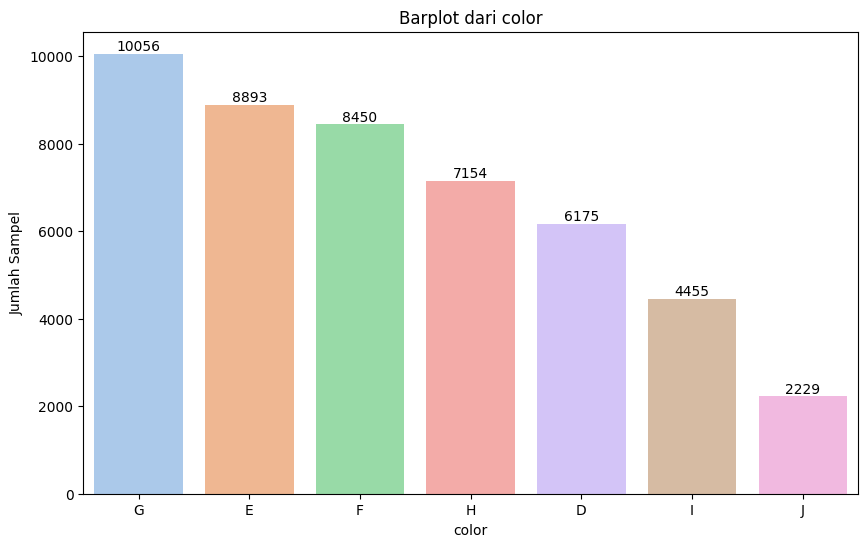

In [18]:
categorical_check(diamonds_df_eda , 'color')

- Insight:
  - Berdasarkan grafik di atas, sebagian besar diamond berada pada kualitas color (warna) yang tergolong menengah hingga agak baik, yaitu pada color G, E, dan F, yang mencakup sekitar 56,8% dari total data.

,Jumlah Sampel,persentase
clarity,,
SI1,11524,24.3%
VS2,10905,23.0%
SI2,7378,15.6%
VS1,7360,15.5%
VVS2,4673,9.9%
VVS1,3455,7.3%
IF,1644,3.5%
I1,473,1.0%


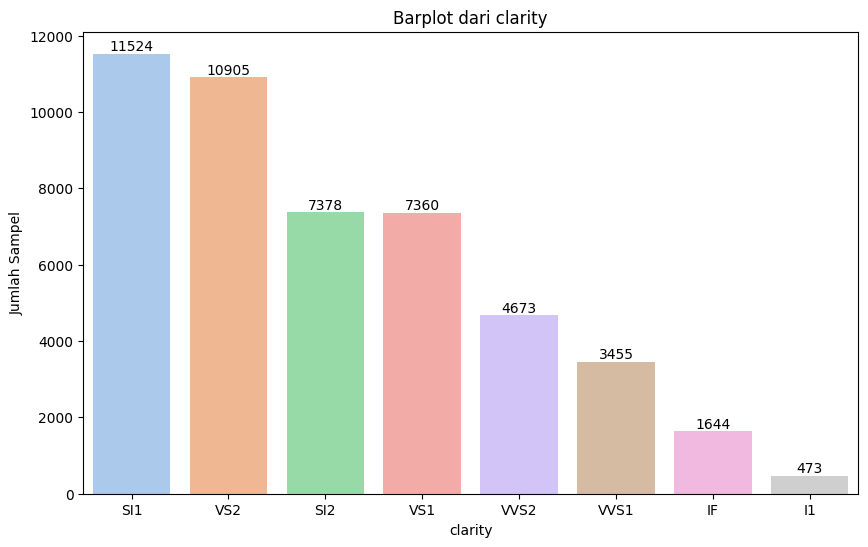

In [19]:
categorical_check(diamonds_df_eda , 'clarity')

- Insight:
  - Berdasarkan grafik di atas, sebagian besar diamond berkualitas kejernihan (clarity) yang rendah hingga menengah, dengan sekitar 64% di antaranya berada pada kategori SI2, SI1, dan VS2.

  - Di sisi lain, berlian dengan kualitas kejernihan terendah (I1) hanya mencakup sekitar 1%, sementara yang memiliki kualitas terbaiknya (IF) mencapai sekitar 3% dari total data.

#### 2.5.2 Numerical Feature

- Membuat visualisasi fitur numerikal dengan histogram untuk melihat persebaran datanya

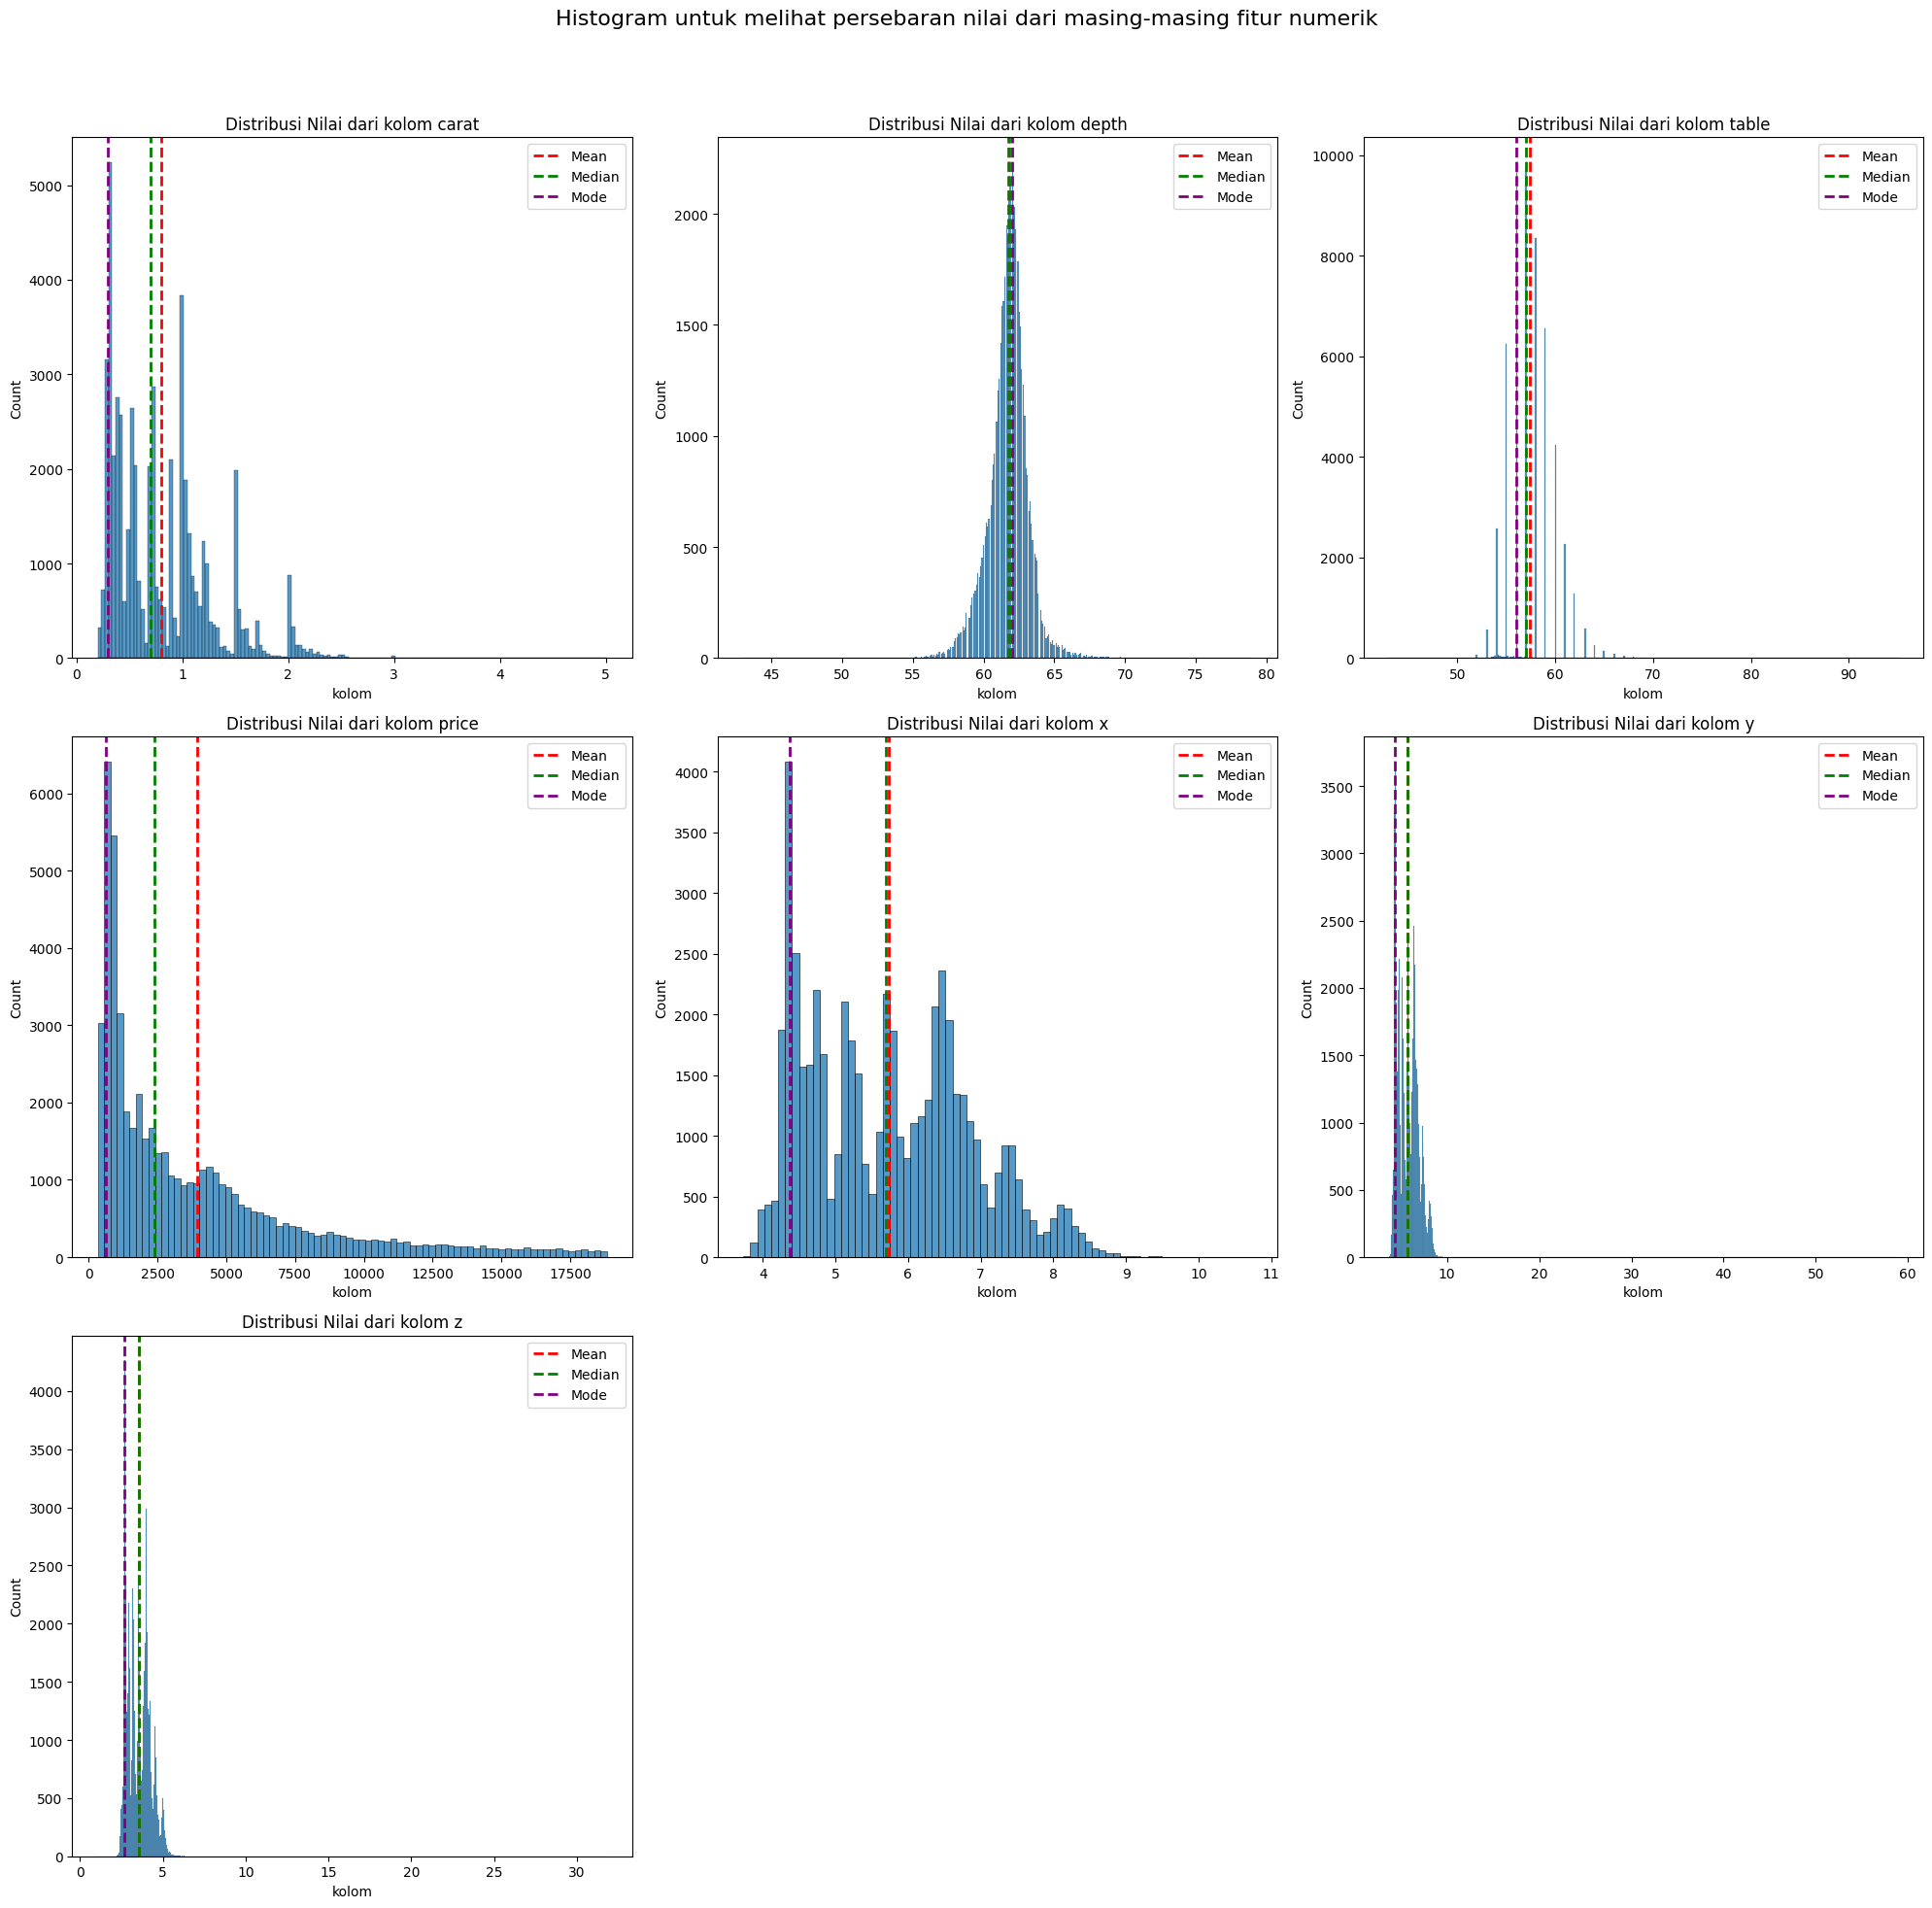

In [20]:
# Membuat visualisasi dengan barplot

## 1. Mempersiapkan datanya
max_col = 3
max_row = math.ceil(len(diamonds_df_eda_num.columns)/max_col)

## 2. Membuay plot
plt.figure(figsize=(20, 20))

for i, col in enumerate(diamonds_df_eda_num.columns):
  mean_value = diamonds_df_eda_num[col].mean()
  median_value = diamonds_df_eda_num[col].median()
  mode_value = diamonds_df_eda_num[col].mode()[0]

  plt.subplot(max_row, max_col, i+1)
  sns.histplot(data=diamonds_df_eda_num, x=col)

  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')
  plt.axvline(mode_value, color='purple', linestyle='dashed', linewidth=2, label='Mode')
  plt.legend()

  plt.title(f'Distribusi Nilai dari kolom {col}')
  plt.xlabel('kolom')

plt.suptitle('Histogram untuk melihat persebaran nilai dari masing-masing fitur numerik', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
diamonds_df_eda_num.skew()

,0
carat,1.113218
depth,-0.113711
table,0.792069
price,1.618220
x,0.396908
y,2.470200
z,1.589309


- Insight:

  1. carat
    - Distribusi nilai pada kolom carat bersifat right-skewed sedang. Hal ini ditunjukkan oleh skewness sebesar 1.116, serta pola histogram di mana sebagian besar data berada pada nilai kecil dengan ekor yang memanjang ke kanan. Rata-rata (mean) lebih besar dari median dan modus.

  2. depth
    - Distribusi nilai pada kolom depth mendekati normal (simetris). Skewness-nya sangat kecil, yaitu -0.081, dan mean, median, serta modus hampir berhimpitan. Bentuk histogram pun memperlihatkan sebaran yang simetris di sekitar pusat data.

  3. table
    - Kolom table menunjukkan distribusi sedikit right-skewed, dengan nilai skewness sebesar 0.797. Histogram menggambarkan puncak distribusi di tengah dengan sedikit pergeseran nilai ke kanan, serta mean yang sedikit lebih besar dari median dan modus.

  4. price
    - Distribusi nilai pada kolom price bersifat sangat right-skewed, dengan skewness sebesar 1.618. Histogram menunjukkan konsentrasi data pada nilai rendah dan ekor panjang ke kanan. Perbedaan antara mean, median, dan modus cukup mencolok.

  5. x
    - Kolom x memiliki distribusi sedikit right-skewed, ditunjukkan oleh skewness sebesar 0.398. Histogram memperlihatkan sebaran yang relatif seimbang namun tetap memiliki kecenderungan ke kanan.

  6. y
   - Distribusi kolom y bersifat sangat right-skewed, dengan nilai skewness tertinggi yaitu 2.462. Histogram menunjukkan banyak nilai kecil di sisi kiri dengan ekor distribusi yang sangat panjang ke kanan. Mean, median, dan modus berhimpitan di bagian kiri.

  7. z
   - Distribusi nilai pada kolom z juga sangat right-skewed, dengan skewness sebesar 1.585. Polanya serupa dengan kolom y, di mana mayoritas data terkumpul pada nilai kecil dan sebagian kecil tersebar jauh di nilai tinggi. Mean, median, dan modus saling berdekatan di bagian kiri distribusi.

- Fitur-fitur yang memiliki distribusi right-skewed disarankan untuk ditransformasi menggunakan logarithmic transformation atau power transformation guna mendekatkan distribusi ke bentuk normal. dan meningkatkan performa model.

### 2.6 EDA - Multivariate Analysis

#### 2.6.1 Categorical Feature
- Pada bagian ini, dilakukan pembuatan tabel dan barplot untuk melihat hubungan atau korelasi antara fitur kategorikal dengan label atau target, yaitu price.

In [22]:
diamonds_df_eda_cat = diamonds_df_eda.select_dtypes(exclude='number')

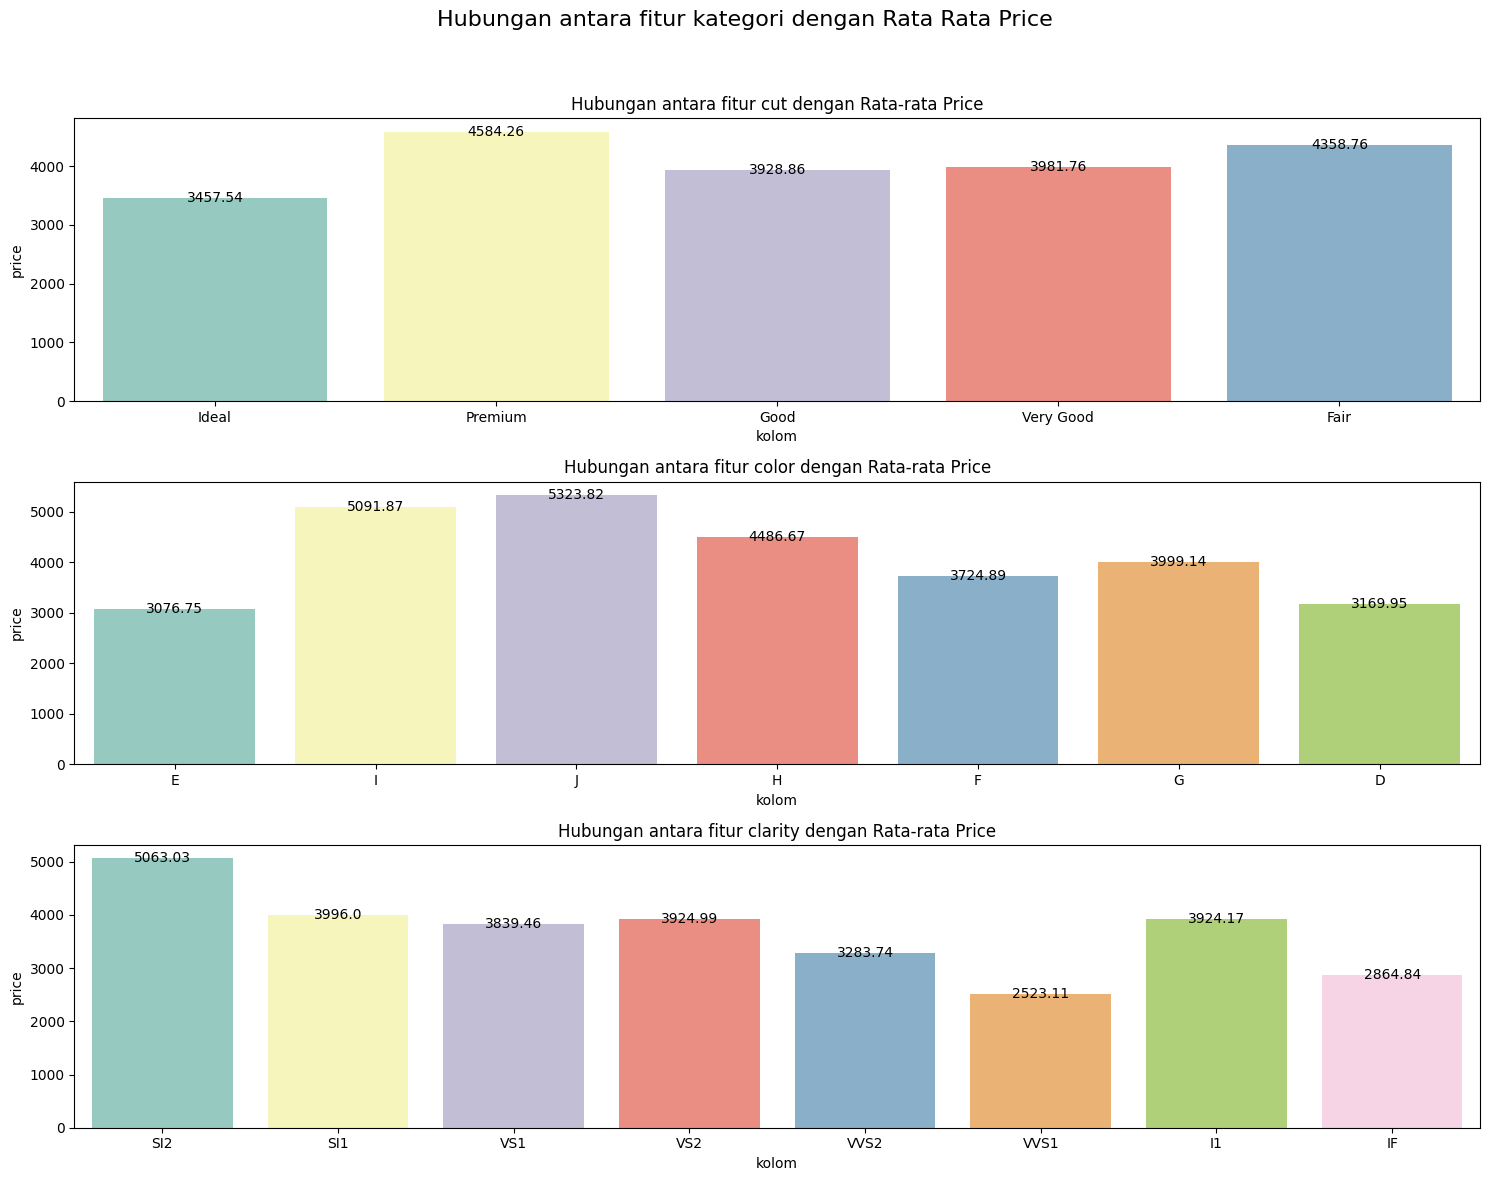

In [23]:
# Membuat visualisasi dengan barplot

## 1. Mempersiapkan datanya
max_col = 1
max_row = math.ceil(len(diamonds_df_eda_cat.columns)/max_col)

## 2. Membuay plot
plt.figure(figsize=(15, 12))

for i, col in enumerate(diamonds_df_eda_cat.columns):
  plt.subplot(max_row, max_col, i+1)
  ax = sns.barplot(data=diamonds_df, x=col, y='price', palette='Set3', errorbar=None, estimator='mean')
  for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            round(bar.get_height(), 2),
            ha='center',
            va='center')

  plt.title(f'Hubungan antara fitur {col} dengan Rata-rata Price')
  plt.xlabel('kolom')
  plt.ylabel('price')

plt.suptitle('Hubungan antara fitur kategori dengan Rata Rata Price', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Insight:
  - Meskipun terdapat perbedaan kualitas dalam setiap fitur kategorikal (cut, color, clarity), harga rata-rata diamond tetap berada dalam kisaran yang relatif mirip, tanpa fluktuasi yang signifikan. Ini menunjukkan bahwa kualitas kategori tidak secara langsung menentukan harga. Berikut detailnya:

    1. Fitur cut:
    - Rata-rata harga diamond berada dalam rentang 3500 hingga 4500 untuk semua kategori cut. Bahkan, grade tertinggi seperti Ideal justru memiliki harga rata-rata yang lebih rendah dibandingkan beberapa grade lain. Ini menunjukkan bahwa cut memiliki pengaruh yang relatif kecil terhadap harga.

    2. Fitur color:
    - Warna terbaik dimulai dari grade D (paling bening), dan menurun ke E, F, hingga J. Namun, data menunjukkan bahwa harga rata-rata diamond tidak selalu lebih tinggi pada grade warna yang lebih baik. Bahkan, grade D tidak memiliki rata-rata harga tertinggi. Ini mengindikasikan bahwa fitur color memiliki pengaruh yang rendah terhadap harga.

    3. Fitur clarity:
    - Meskipun grade clarity yang lebih tinggi (misalnya IF atau VVS1) secara teknis lebih baik, rata-rata harganya tidak selalu lebih tinggi. Beberapa grade menengah seperti VS2 atau SI1 justru menunjukkan harga rata-rata yang cukup tinggi, menandakan bahwa fitur clarity juga memiliki pengaruh yang terbatas terhadap harga.

  - Ketiga fitur kategorikal (cut, color, dan clarity) memiliki pengaruh yang rendah terhadap perubahan rata-rata harga diamond.

- Selanjutnya, dilakukan pengujian hipotesis chi-square untuk melihat hubungan antar fitur kategorikal dan apakah terdapat multikolinearitas. Hasilnya dapat dilihat dalam heatmap.

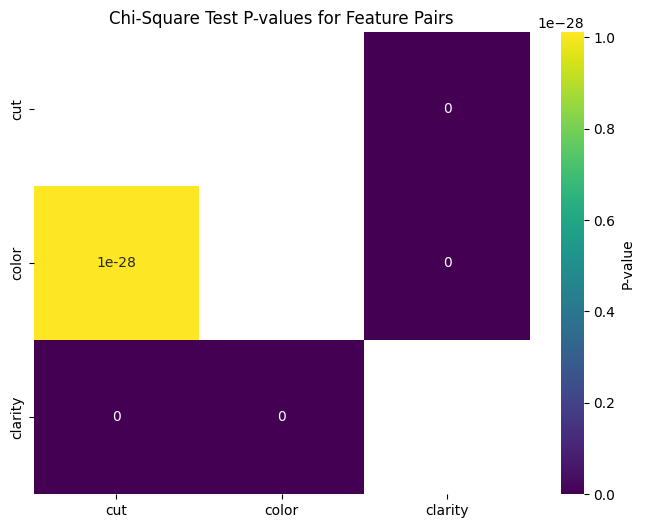

In [24]:
# Membuat visualisasi heatmap

## 1. Menyimpan hasil uji hipotesis dalam dataframe
p_value_matrix = pd.DataFrame(index=diamonds_df_eda_cat.columns, columns=diamonds_df_eda_cat.columns)

## 2. Melakukan pengujian hipotesis
for i,j in itertools.combinations(diamonds_df_eda_cat.columns, 2):
  contigency_table = pd.crosstab(diamonds_df_eda_cat[i], diamonds_df_eda_cat[j])
  chi2, p_value, dof, expected = stats.chi2_contingency(contigency_table)
  p_value_matrix.loc[i,j] = p_value
  p_value_matrix.loc[j,i] = p_value

## 3. Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(p_value_matrix.astype(float),
            annot=True,
            cmap='viridis',
            fmt='.2g',
            cbar_kws={'label': 'P-value'},
            mask = np.triu(p_value_matrix))
plt.title('Chi-Square Test P-values for Feature Pairs')
plt.show()

- Insight:
  - Berdasarkan uji Chi-Square terhadap fitur kategorikal cut, color, dan clarity, diperoleh bahwa semua pasangan fitur menghasilkan p-value di atas 0.05. Hal ini menunjukkan bahwa:

    - Tidak ada hubungan yang signifikan antara kombinasi cut dan color, cut dan clarity.

    - Secara statistik, kita menerima hipotesis nol yang menyatakan bahwa fitur-fitur ini tidak saling berhubungan (independen).

#### 2.6.2 Numerical Feature
- Disini, saya mau melihat hubungan/korelasi antara fitur numerik dengan label/targetnya yaitu price

#### a. Regplot

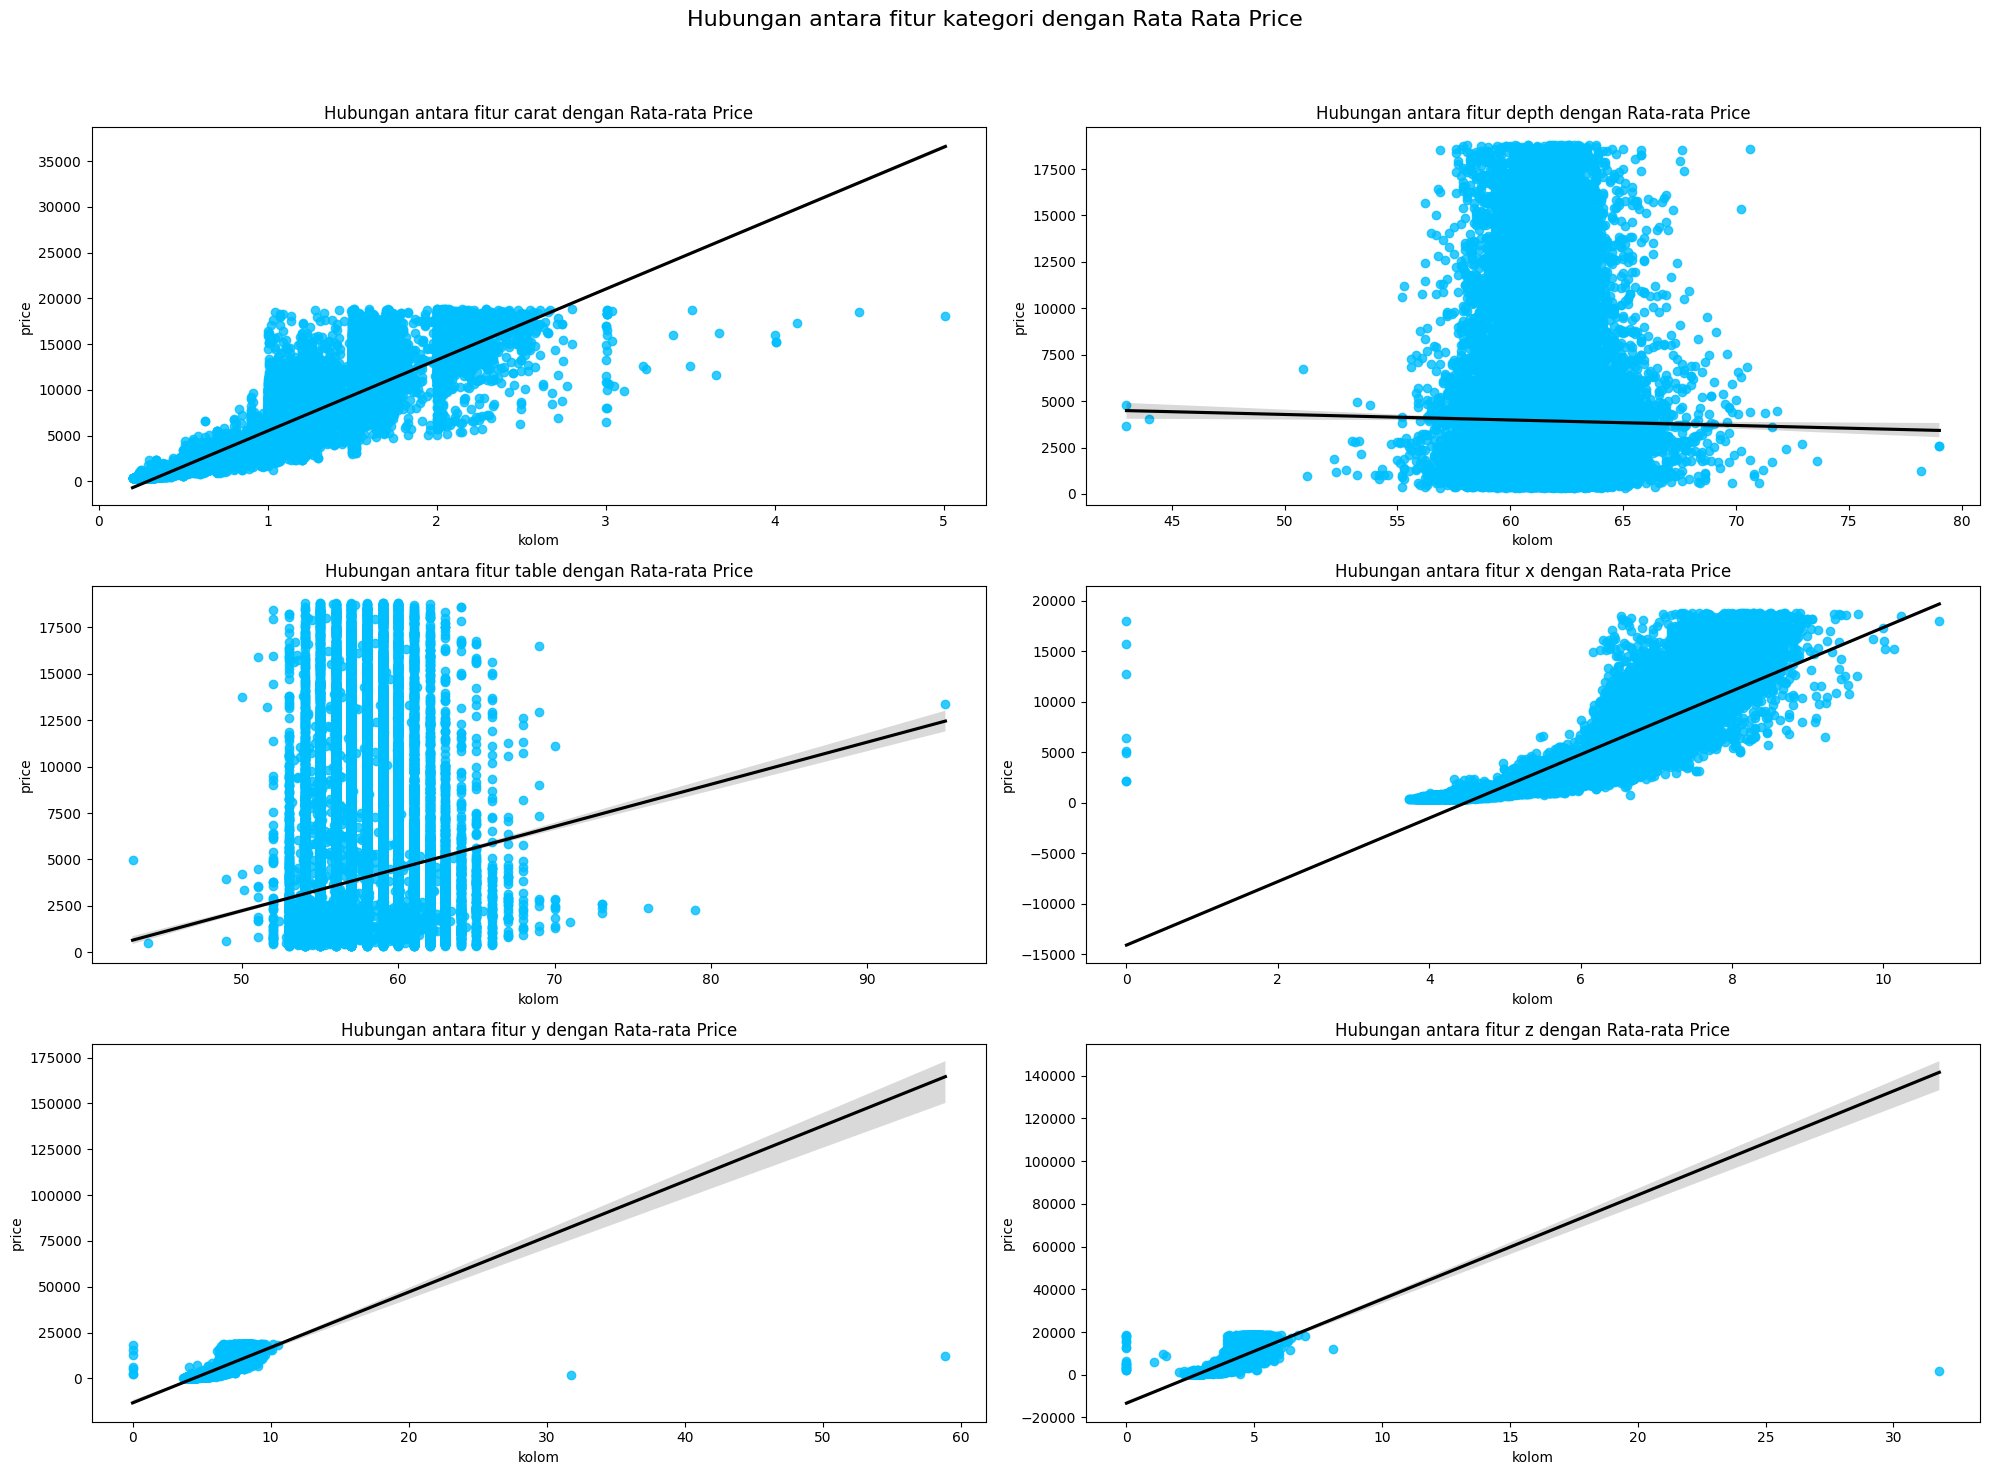

In [25]:
# Membuat visualisasi regplot

## 1. Mempersiapkan datanya
max_col = 2
max_row = math.ceil(len(diamonds_df_eda_num.drop(columns='price').columns)/max_col)

## 2. Membuay plot
plt.figure(figsize=(20, 15))

for i, col in enumerate(diamonds_df_eda_num.drop(columns='price').columns):
  plt.subplot(max_row, max_col, i+1)
  sns.regplot(data=diamonds_df, x=col, y='price', scatter_kws={'color':'deepskyblue'}, line_kws={'color':'black'})
  plt.title(f'Hubungan antara fitur {col} dengan Rata-rata Price')
  plt.xlabel('kolom')
  plt.ylabel('price')

plt.suptitle('Hubungan antara fitur kategori dengan Rata Rata Price', size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### b. Heatmap

In [26]:
corr_matrix = diamonds_df_eda_num.corr().round(2)
corr_matrix

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.96
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.89,0.87,0.87
x,0.98,-0.03,0.20,0.89,1.00,0.97,0.98
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.96
z,0.96,0.09,0.15,0.87,0.98,0.96,1.00


<Axes: >

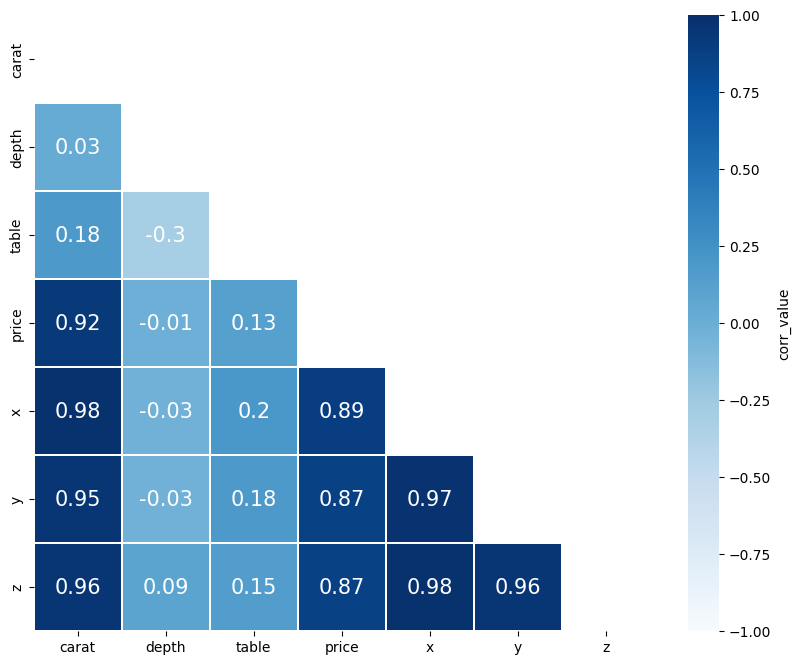

In [27]:
# Membuat Grafik Heatmap
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(
    data=corr_matrix,
    vmin=-1,
    vmax=1,
    cmap='Blues',
    annot=True,
    annot_kws={'size':15, 'color':'white'},
    cbar_kws={'label':'corr_value'},
    square = True,
    lw = 0.1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool))

)

- Insight:
  - Berdasarkan dua visualisasi yang diberikan, terlihat hubungan antara masing-masing fitur dengan label (price) sebagai berikut:
  1. Tidak Ada Korelasi
      - Fitur depth tidak menunjukkan korelasi dengan price. Hal ini terlihat dari regplot yang garis regresinya yang sejajar, serta tidak ada pola yang jelas antara depth dan price. Hal ini menyebabkan fitur **depth** dapat dihapus saat proses preprocessing.

  2. Korelasi Sangat Lemah
      - Fitur table memiliki korelasi positif yang sangat lemah dengan price. Ditunjukkan oleh regplot yang hanya menunjukkan kenaikan yang sangat kecil, serta nilai korelasi yang rendah, yaitu sekitar 0.18.

  3. Korelasi Sangat Kuat
      - Fitur carat, x, y, dan z menunjukkan korelasi positif yang sangat kuat dengan price. Artinya, semakin besar ukuran dan berat diamond, maka harga cenderung semakin tinggi.

  4. Korelasi Antar Fitur
    - Terdapat korelasi sangat tinggi antar fitur carat, x, y, dan z (corr ≈ 0.96-1), yang mengindikasikan adanya multikolinearitas. Hal ini dapat memengaruhi hasil pelatihan model regresi. Disarankan untuk mereduksi fitur-fitur ini, misalnya dengan PCA atau membuat satu fitur gabungan (seperti volume atau ukuran total) pada saat preprocessing.


## 3. Data Preparation (Preprocessing)

### 3.1 Menghapus Fitur yang tidak Berguna
- Berdasarkan hasil eksplorasi data (EDA), terdapat satu fitur yang tidak berpengaruh terhadap harga diamond, yaitu fitur depth.

- Fitur ini akan dihapus agar analisis dan pemodelan menjadi lebih efisien

In [28]:
diamonds_df_clean = diamonds_df_eda.copy()
diamonds_df_clean = diamonds_df_clean.drop(columns='depth')
diamonds_df_clean

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


### 3.2 Menangani Data Skewed
- Berdasarkan hasil EDA, hampir semua fitur memiliki distribusi yang right-skewed, kecuali fitur depth (yang sebelumnya sudah dihapus).

- Untuk mengatasi hal ini dan membuat distribusi data lebih mendekati normal, dilakukan transformasi menggunakan Power Transformer.

In [29]:
# Membuat fungsi untuk transformasi

# 1. Salin dataframe asli
df_transformed = diamonds_df_clean.copy()

# 2. Siapkan dictionary untuk menyimpan transformer tiap kolom
power_transformers = {}

# 3. Daftar kolom yang akan ditransformasi
cols_to_transform = ['carat', 'table', 'x', 'y', 'z', 'price']

# 4. Lakukan transformasi dan simpan objek transformernya
for col in cols_to_transform:
    transformer = PowerTransformer(standardize=True)
    y = np.asarray(df_transformed[col]).reshape(-1, 1)
    df_transformed[f'transform_{col}'] = transformer.fit_transform(y)
    df_transformed.drop(columns=[col], inplace=True)
    power_transformers[col] = transformer

# 5. Gabungkan kembali dengan kolom kategorikal
transform_diamonds_df_clean = df_transformed.copy()
transform_diamonds_df_clean

,cut,color,clarity,transform_carat,transform_table,transform_x,transform_y,transform_z,transform_price
0,Ideal,E,SI2,-1.692150,-1.160015,-1.860285,-1.832268,-1.873688,-2.067771
1,Premium,E,SI1,-1.809656,1.711596,-1.949955,-2.042745,-2.164543,-2.067771
3,Premium,I,VS2,-1.363659,0.435598,-1.501682,-1.475171,-1.419333,-2.039282
4,Good,J,SI2,-1.261519,0.435598,-1.310745,-1.311670,-1.163226,-2.035771
5,Very Good,J,VVS2,-1.634964,-0.056320,-1.875129,-1.861855,-1.756676,-2.032271
...,...,...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,0.265132,-0.056320,0.302264,0.306959,0.212071,0.325269
53936,Good,D,SI1,0.265132,-1.160015,0.243074,0.297091,0.386796,0.325269
53937,Very Good,D,SI1,0.209346,1.316654,0.213213,0.227474,0.308108,0.325269
53938,Premium,H,SI2,0.618794,0.435598,0.679720,0.649866,0.585901,0.325269


### 3.3 Mengidentifikasi Fitur (X) dan Label (y)
- Dari dataset diamond , fitur (X) terdiri dari seluruh kolom kecuali kolom price.

- Kolom price digunakan sebagai label (y) karena merupakan target yang ingin diprediksi.

In [30]:
X = transform_diamonds_df_clean.drop(columns='transform_price')
y = transform_diamonds_df_clean['transform_price']

### 3.4. Split Data Train - Testing
- Disini dilakukan pembangian datanya dengan proporsi 80% data latih dan 20% data uji

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Jumlah data awalnya : {len(X)}')
print(f'Jumlah data train : {len(X_train)}')
print(f'Jumlah data test : {len(X_test)}')

Jumlah data awalnya : 47412
Jumlah data train : 37929
Jumlah data test : 9483


In [43]:
len(y_test)

9483

### 3.5 Feature Dimensionality Reduction with PCA
- Proses ini melakukan reduksi dimensi pada fitur-fitur yang memiliki korelasi tinggi menggunakan metode PCA (Principal Component Analysis).

- Berdasarkan hasil EDA, fitur-fitur yang menunjukkan korelasi tinggi adalah carat, x, y, dan z.

- Sebelum melakukan PCA, pastikan data telah melalui proses standardisasi atau normalisasi, karena PCA sangat sensitif terhadap perbedaan skala dan jarak antar data.

- PCA digunakan pada model-model berbasis linear (seperti regresi linier, SVM linear, dan KNN) untuk mengurangi multikolinearitas dan meningkatkan efisiensi model.

- Namun, untuk model berbasis pohon keputusan (seperti Random Forest dan XGBoost), PCA tidak diperlukan karena model tersebut tidak sensitif terhadap korelasi antar fitur.

In [32]:
# Inisiasi PCA untuk 1 komponen utama
pca = PCA(n_components=1, random_state=42)

# Pilih hanya fitur numerik untuk PCA
numerical_features = ['transform_carat', 'transform_x', 'transform_y', 'transform_z']
other_features = [col for col in X_train.columns if col not in numerical_features]
X_train_pca = X_train.copy()
X_test_pca = X_test.copy()

# Lakukan proses PCA pada fitur numerik
X_train_pca['dimension'] = pca.fit_transform(X_train[numerical_features])
X_test_pca['dimension'] = pca.transform(X_test[numerical_features])

# Gabungkan kembali kolomnya
X_train_pca = X_train_pca[other_features].join(X_train_pca[['dimension']])
X_test_pca = X_test_pca[other_features].join(X_test_pca[['dimension']])

# Hasil akhir
X_train_pca, X_test_pca

(             cut color clarity  transform_table  dimension
 48533  Very Good     H     SI1         2.422707   0.440939
 16633  Very Good     I     VS1        -1.463804   2.496607
 28190  Very Good     D     SI2         0.892237  -1.696029
 52017       Good     F     SI1         1.711596   0.436738
 50648       Good     H     VS1        -0.056320  -2.612108
 ...          ...   ...     ...              ...        ...
 12282    Premium     H     SI2         0.435598   2.880152
 51036    Premium     E     SI1         1.711596   0.458977
 44058      Ideal     H     SI1        -1.779850   0.349590
 951        Ideal     E    VVS2        -1.779850  -0.782207
 17066    Premium     G     SI1         0.435598  -2.507787
 
 [37929 rows x 5 columns],
              cut color clarity  transform_table  dimension
 26030      Ideal     G     VS1        -0.586924  -2.430962
 50973       Good     E     SI1        -1.160015  -2.526749
 14605      Ideal     I     VS1        -0.056320   2.408942
 23060     

### 3.6 Feature Encoding
- Adapun tahapan terakhir dalam data preparation adalah dilakukan encoding pada kolom fitur kategorikal menggunakan teknik one-hot encoding.

- One-hot encoding dipilih karena fitur-fitur kategorikal tersebut tidak memiliki urutan atau hubungan numerik yang jelas terhadap label (bersifat nominal), sehingga teknik ini paling sesuai untuk merepresentasikan nilai-nilai kategorikal tersebut secara adil tanpa memberikan bobot tertentu.

In [33]:
# Melakukan one-hot encoding pada kolom kategorikal

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_pca[['cut', 'color', 'clarity']]), columns=encoder.get_feature_names_out(['cut', 'color', 'clarity']))
X_test_encoded = pd.DataFrame(encoder.transform(X_test_pca[['cut', 'color', 'clarity']]), columns=encoder.get_feature_names_out(['cut', 'color', 'clarity']))

# Menggabungkan hasil encoding
X_train_encoded_pca = X_train_encoded.join(X_train_pca.reset_index(drop=True))
X_train_encoded_non_pca = X_train_encoded.join(X_train.reset_index(drop=True))

X_test_encoded_pca = X_test_encoded.join(X_test_pca.reset_index(drop=True))
X_test_encoded_non_pca = X_test_encoded.join(X_test.reset_index(drop=True))

# Hapus kolom kategorikal sebelum encoding
X_train_encoded_pca.drop(columns=['cut', 'color', 'clarity'], inplace=True)
X_train_encoded_non_pca.drop(columns=['cut', 'color', 'clarity'], inplace=True)

X_test_encoded_pca.drop(columns=['cut', 'color', 'clarity'], inplace=True)
X_test_encoded_non_pca.drop(columns=['cut', 'color', 'clarity'], inplace=True)

# Cek Jumlah baris dan kolom setelah encoding
print(f'Jumlah baris dan kolom train setelah encoding dengan pca adalah {X_train_encoded_pca.shape}')
print(f'Jumlah baris dan kolom train setelah encoding tanpa pca adalah {X_train_encoded_non_pca.shape}\n')

print(f'Jumlah baris dan kolom test setelah encoding dengan pca adalah {X_test_encoded_pca.shape}')
print(f'Jumlah baris dan kolom test setelah encoding tanpa pca adalah {X_test_encoded_non_pca.shape}')

Jumlah baris dan kolom train setelah encoding dengan pca adalah (37929, 19)
Jumlah baris dan kolom train setelah encoding tanpa pca adalah (37929, 22)

Jumlah baris dan kolom test setelah encoding dengan pca adalah (9483, 19)
Jumlah baris dan kolom test setelah encoding tanpa pca adalah (9483, 22)


In [36]:
# Pilih Fiturnya

X_train_selected_pca = X_train_encoded_pca
X_train_selected_non_pca = X_train_encoded_non_pca

X_test_selected_pca = X_test_encoded_pca
X_test_selected_non_pca = X_test_encoded_non_pca

## 4. Modeling
- ada tahap ini, dilakukan pembuatan dan pelatihan model machine learning dengan menggunakan 10 algoritma regresi. Tujuannya adalah untuk membandingkan performa masing-masing model dan memilih model terbaik berdasarkan metrik evaluasi.

Adapun model-model yang digunakan adalah sebagai berikut:
  1. Linear Regression

  2. ElasticNet

  3. K-Nearest Neighbors Regressor

  4. Support Vector Regressor (SVR)

  5. Decision Tree Regressor

  6. Random Forest Regressor

  7. Gradient Boosting Regressor

  8. XGBoost Regressor

  9. LightGBM Regressor

  10. Multi-layer Perceptron Regressor (MLPRegressor)

Setiap model akan dievaluasi menggunakan metrik seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R-squared (R²).

### 4.1 Baseline Model
- Pada tahapan ini dilakukan pelatihan dengan menggunakan baseline atau parameter bawaan dari model tanpa perubahan apapun

In [ ]:
# Pengujian pada model berbasis jarak

result_1 = []

models = [
    LinearRegression(),
    ElasticNet(),
    KNeighborsRegressor(),
    SVR(),
    MLPRegressor(random_state=42, max_iter=300)
]

for model in models:
    model.fit(X_train_selected_pca, y_train)
    y_pred = model.predict(X_test_selected_pca)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    result_1.append({
        'Model Name': model.__class__.__name__,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

results_df_1 = pd.DataFrame(result_1)
results_df_1.sort_values('R2', ascending=False)

,Model Name,MAE,RMSE,R2
3,SVR,0.091949,0.117725,0.986098
4,MLPRegressor,0.092516,0.119247,0.985736
0,LinearRegression,0.109171,0.140097,0.980312
2,KNeighborsRegressor,0.105250,0.143077,0.979465
1,ElasticNet,0.342718,0.421286,0.821965


In [ ]:
# Model berbasis tree

result_2 = []

models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
]

for model in models:
    model.fit(X_train_selected_non_pca, y_train)
    y_pred = model.predict(X_test_selected_non_pca)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    result_2.append({
        'Model Name': model.__class__.__name__,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

results_df_2 = pd.DataFrame(result_2)
results_df_2.sort_values('R2', ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 37929, number of used features: 22
[LightGBM] [Info] Start training from score 0.002105


,Model Name,MAE,RMSE,R2
4,LGBMRegressor,0.070208,0.096029,0.990750
3,XGBRegressor,0.069498,0.096538,0.990651
1,RandomForestRegressor,0.068960,0.102545,0.989452
0,DecisionTreeRegressor,0.089018,0.137349,0.981077
2,GradientBoostingRegressor,0.103257,0.140817,0.980109


In [ ]:
# Gabungkan hasil kedua Model
resulted = pd.concat([results_df_1, results_df_2]).sort_values(by='R2', ascending=False).reset_index(drop=True)
resulted

,Model Name,MAE,RMSE,R2
0,LGBMRegressor,0.070208,0.096029,0.990750
1,XGBRegressor,0.069498,0.096538,0.990651
2,RandomForestRegressor,0.068960,0.102545,0.989452
3,SVR,0.091949,0.117725,0.986098
4,MLPRegressor,0.092516,0.119247,0.985736
5,DecisionTreeRegressor,0.089018,0.137349,0.981077
6,LinearRegression,0.109171,0.140097,0.980312
7,GradientBoostingRegressor,0.103257,0.140817,0.980109
8,KNeighborsRegressor,0.105250,0.143077,0.979465
9,ElasticNet,0.342718,0.421286,0.821965


### 4.2 Hyperparameter Tuning
- Pada tahap ini, dilakukan pelatihan model dengan Grid Search untuk melakukan penyesuaian hyperparameter secara sistematis guna memperoleh kombinasi parameter terbaik yang menghasilkan performa model optimal.

In [ ]:
def grid_search_and_train(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

def plot_learning(model, X_train, y_train, model_name):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Train R2')
    plt.plot(train_sizes, val_scores_mean, label='Validation R2')
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
    plt.show()

def run_all_models(models, params, X_train_selected_pca, X_train_selected_non_pca, X_test_selected_pca, X_test_selected_non_pca, y_train, y_test):
    results = []

    for i in range(len(models)):
        model = models[i]
        param_grid = params[i]
        name = model.__class__.__name__

        print(f"\n🔍 Running GridSearchCV for {name}...")

        if name in ['LinearRegression', 'ElasticNet', 'KNeighborsRegressor', 'SVR', 'MLPRegressor']:
           print(f"📦 {name} menggunakan data PCA untuk training dan testing.")
           grid_pca = grid_search_and_train(model, param_grid, X_train_selected_pca, y_train)
           best_model = grid_pca.best_estimator_
           print(f"✅ Best Params for {name}: {grid_pca.best_params_}")

           X_test_eval = X_test_selected_pca
           X_train_eval = X_train_selected_pca

        else:
           print(f"🌳 {name} menggunakan data non-PCA untuk training dan testing.")
           print(f'Model Menggunakan Non PCA sebagai training dan testing')
           grid_non_pca = grid_search_and_train(model, param_grid, X_train_selected_non_pca, y_train)
           best_model = grid_non_pca.best_estimator_
           print(f"✅ Best Params for {name}: {grid_non_pca.best_params_}")

           X_test_eval = X_test_selected_non_pca
           X_train_eval = X_train_selected_non_pca


        print(f"🏃 Evaluating {name}...")
        mae, rmse, r2 = evaluate_model(best_model, X_test_eval, y_test)

        results.append({
            'Model Name': name,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })

        print(f"📈 Plotting Learning Curve for {name}...")
        plot_learning(best_model, X_train_eval, y_train, name)

    results_df = pd.DataFrame(results)
    return results_df.sort_values(by='R2', ascending=False)


🔍 Running GridSearchCV for LinearRegression...
📦 LinearRegression menggunakan data PCA untuk training dan testing.
✅ Best Params for LinearRegression: {'fit_intercept': True, 'positive': False}
🏃 Evaluating LinearRegression...
📈 Plotting Learning Curve for LinearRegression...


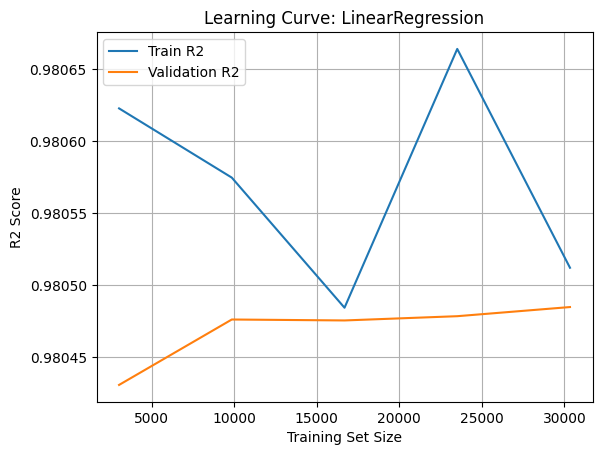


🔍 Running GridSearchCV for ElasticNet...
📦 ElasticNet menggunakan data PCA untuk training dan testing.
✅ Best Params for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0}
🏃 Evaluating ElasticNet...
📈 Plotting Learning Curve for ElasticNet...


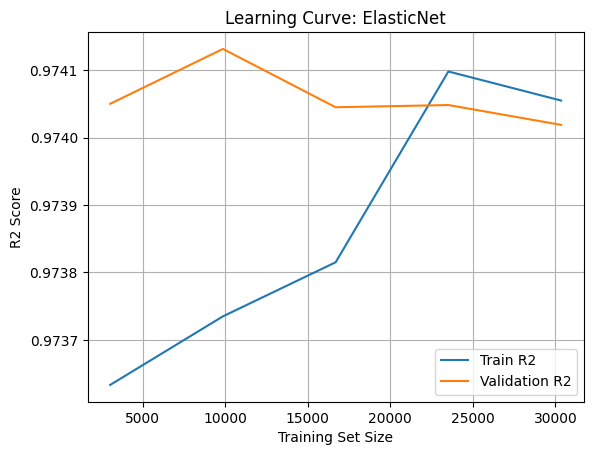


🔍 Running GridSearchCV for KNeighborsRegressor...
📦 KNeighborsRegressor menggunakan data PCA untuk training dan testing.
✅ Best Params for KNeighborsRegressor: {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
🏃 Evaluating KNeighborsRegressor...
📈 Plotting Learning Curve for KNeighborsRegressor...


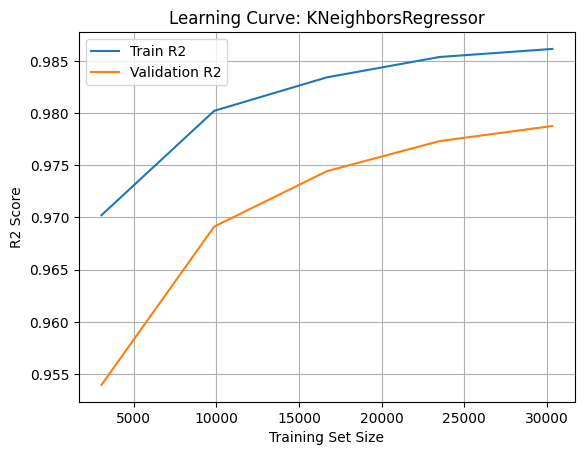


🔍 Running GridSearchCV for SVR...
📦 SVR menggunakan data PCA untuk training dan testing.
✅ Best Params for SVR: {'C': 1.0, 'epsilon': 0.1, 'kernel': 'rbf'}
🏃 Evaluating SVR...
📈 Plotting Learning Curve for SVR...


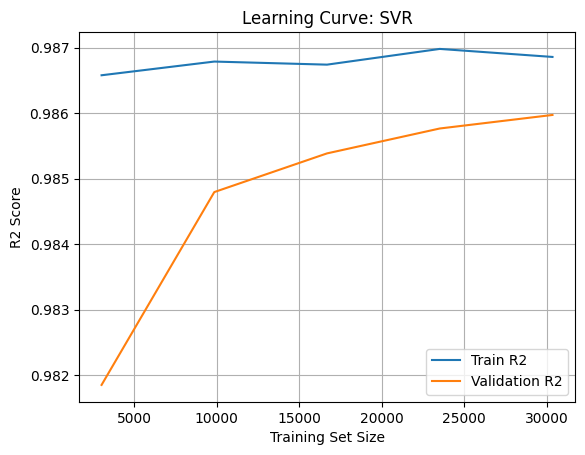


🔍 Running GridSearchCV for DecisionTreeRegressor...
🌳 DecisionTreeRegressor menggunakan data non-PCA untuk training dan testing.
Model Menggunakan Non PCA sebagai training dan testing
✅ Best Params for DecisionTreeRegressor: {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
🏃 Evaluating DecisionTreeRegressor...
📈 Plotting Learning Curve for DecisionTreeRegressor...


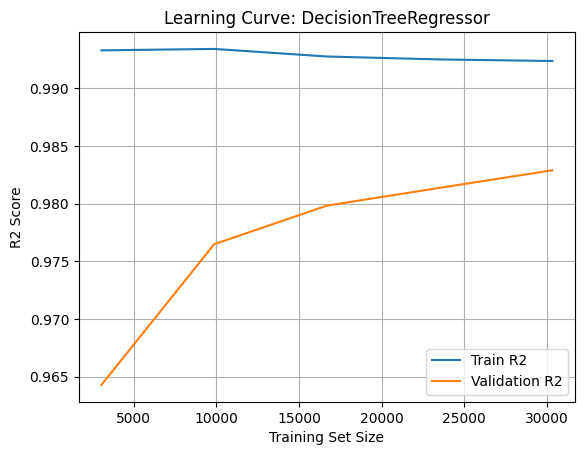


🔍 Running GridSearchCV for RandomForestRegressor...
🌳 RandomForestRegressor menggunakan data non-PCA untuk training dan testing.
Model Menggunakan Non PCA sebagai training dan testing
✅ Best Params for RandomForestRegressor: {'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
🏃 Evaluating RandomForestRegressor...
📈 Plotting Learning Curve for RandomForestRegressor...


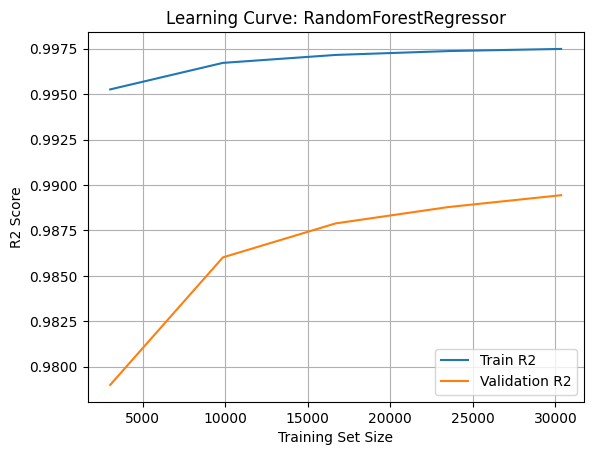


🔍 Running GridSearchCV for GradientBoostingRegressor...
🌳 GradientBoostingRegressor menggunakan data non-PCA untuk training dan testing.
Model Menggunakan Non PCA sebagai training dan testing
✅ Best Params for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
🏃 Evaluating GradientBoostingRegressor...
📈 Plotting Learning Curve for GradientBoostingRegressor...


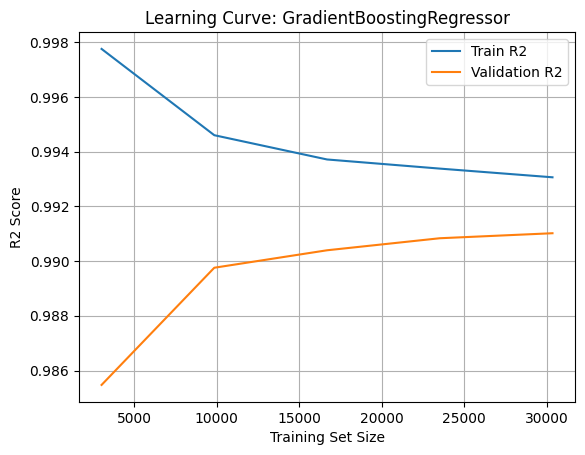


🔍 Running GridSearchCV for XGBRegressor...
🌳 XGBRegressor menggunakan data non-PCA untuk training dan testing.
Model Menggunakan Non PCA sebagai training dan testing
✅ Best Params for XGBRegressor: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
🏃 Evaluating XGBRegressor...
📈 Plotting Learning Curve for XGBRegressor...


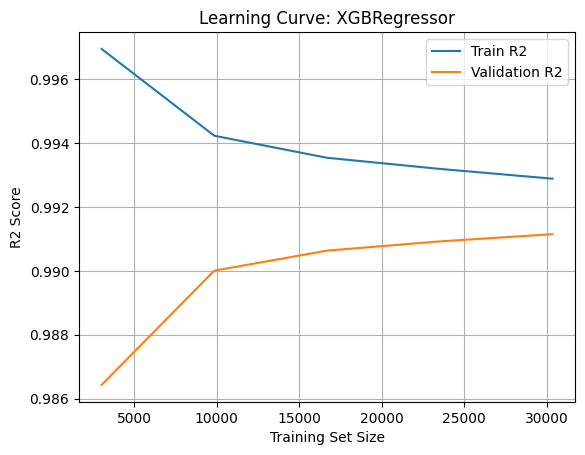


🔍 Running GridSearchCV for LGBMRegressor...
🌳 LGBMRegressor menggunakan data non-PCA untuk training dan testing.
Model Menggunakan Non PCA sebagai training dan testing
✅ Best Params for LGBMRegressor: {'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 500, 'num_leaves': 70, 'verbosity': -1}
🏃 Evaluating LGBMRegressor...
📈 Plotting Learning Curve for LGBMRegressor...


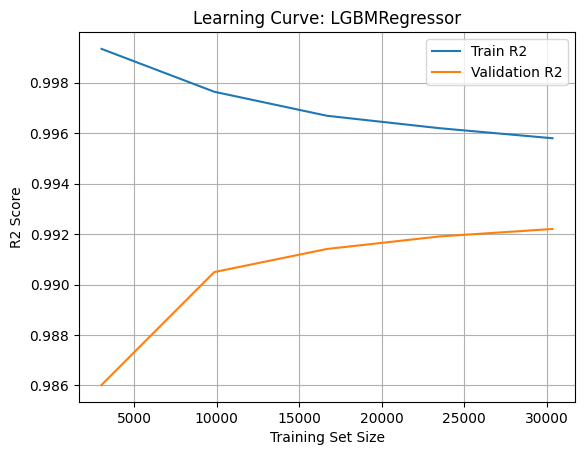


🔍 Running GridSearchCV for MLPRegressor...
📦 MLPRegressor menggunakan data PCA untuk training dan testing.
✅ Best Params for MLPRegressor: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
🏃 Evaluating MLPRegressor...
📈 Plotting Learning Curve for MLPRegressor...


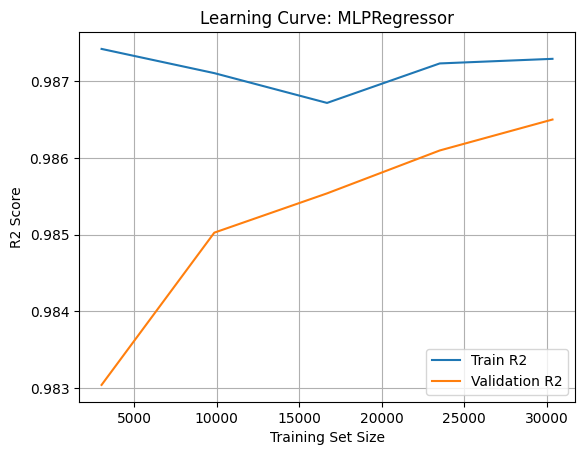

In [ ]:
models = [
    LinearRegression(),
    ElasticNet(),
    KNeighborsRegressor(),
    SVR(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(random_state=42),
    LGBMRegressor(random_state=42),
    MLPRegressor(random_state=42, max_iter=300, early_stopping=True)
]

param_grid = [
    # 1. LinearRegression (default: fit_intercept=True, positive=False)
    {'fit_intercept': [True, False], 'positive': [False, True]},

    # 2. ElasticNet (default: alpha=1.0, l1_ratio=0.5)
    {
        'alpha': [1.0, 0.01, 0.1],
        'l1_ratio': [0, 0.3, 0.5, 0.7, 1.0]
    },

    # 3. KNeighborsRegressor (default: n_neighbors=5, weights='uniform', metric='minkowski')
    {
        'n_neighbors': [5, 3, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    },

    # 4. SVR (default: C=1.0, kernel='rbf', epsilon=0.1)
    {
        'C': [1.0, 0.1],
        'kernel': ['rbf', 'linear'],
        'epsilon': [0.1, 0.01]
    },

    # 5. DecisionTreeRegressor (default: max_depth=None, min_samples_split=2, max_leaf_nodes=None, min_samples_leaf=1, max_features=None)
    {
        'max_depth': [None, 5, 15],
        'min_samples_split': [2, 5],
        'max_leaf_nodes': [None, 15, 30],
        'min_samples_leaf': [1, 2],
        'max_features': [None, 'sqrt']
    },

    # 6. RandomForestRegressor (default: n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None)
    {
        'n_estimators': [100, 50, 500],
        'max_depth': [None, 5],
        'max_leaf_nodes': [None, 15, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': [1.0, 'sqrt', None]
    },

    # 7. GradientBoostingRegressor (default: n_estimators=100, learning_rate=0.1, max_depth=3)
    {
        'n_estimators': [100, 500],
        'learning_rate': [0.1, 0.01, 0.05],
        'max_depth': [3, 5, None]
    },

    # 8. XGBRegressor (default: n_estimators=100, learning_rate=0.1, max_depth=3, colsample_bytree=1.0)
    {
        'n_estimators': [100, 500],
        'learning_rate': [0.1, 0.01, 0.05],
        'max_depth': [3, 5, 0],
        'colsample_bytree': [1.0, 0.3, 0.8]
    },

    # 9. LGBMRegressor (default: n_estimators=100, learning_rate=0.1, max_depth=-1, num_leaves=31, min_data_in_leaf=20)
    {
        'n_estimators': [100, 500],
        'learning_rate': [0.1, 0.01, 0.05],
        'max_depth': [-1, 3, 5],
        'num_leaves': [31, 15, 70],
        'min_data_in_leaf': [20, 10],
        'verbosity': [-1]
    },

    # 10. MLPRegressor (default: hidden_layer_sizes=(100,), activation='relu', learning_rate_init=0.001)
    {
        'hidden_layer_sizes': [(100,), (50,)],
        'activation': ['relu'],  # default only
        'learning_rate_init': [0.001, 0.01]
    }
]

results_df = run_all_models(
    models,
    param_grid,
    X_train_selected_pca,
    X_train_selected_non_pca,
    X_test_selected_pca,
    X_test_selected_non_pca,
    y_train,
    y_test
)

In [ ]:
print(f'Hasil setelah hyperparameter tuning adalah sebagai berikut : \n')
results_df.sort_values(by='R2', ascending=False)

Hasil setelah hyperparameter tuning adalah sebagai berikut : 



,Model Name,MAE,RMSE,R2
8,LGBMRegressor,0.062714,0.088848,0.992081
6,GradientBoostingRegressor,0.068371,0.095453,0.990860
7,XGBRegressor,0.068755,0.095468,0.990858
5,RandomForestRegressor,0.068667,0.102202,0.989522
9,MLPRegressor,0.089661,0.116516,0.986382
3,SVR,0.091949,0.117725,0.986098
4,DecisionTreeRegressor,0.087856,0.128110,0.983537
0,LinearRegression,0.109171,0.140097,0.980312
2,KNeighborsRegressor,0.105250,0.143077,0.979465
1,ElasticNet,0.119310,0.160173,0.974265


## 5. Evaluasi Model

### 5.1 Evaluasi menggunakan Metrik
- Pada tahap ini, model terbaik dicari berdasarkan perhitungan metrik MAE, RMSE, dan R², baik sebelum maupun setelah dilakukan tuning.

In [34]:
# Data sebelum tuning
data_before = {
    'Model Name': ['LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor',
                   'SVR', 'MLPRegressor', 'DecisionTreeRegressor',
                   'LinearRegression', 'GradientBoostingRegressor',
                   'KNeighborsRegressor', 'ElasticNet'],
    'MAE': [0.070208, 0.069498, 0.068960,
            0.091949, 0.092516, 0.089018,
            0.109171, 0.103257, 0.105250,
            0.342718],
    'RMSE': [0.096029, 0.096538, 0.102545,
             0.117725, 0.119247, 0.137349,
             0.140097, 0.140817, 0.143077,
             0.421286],
    'R2': [0.990750, 0.990651, 0.989452,
           0.986098, 0.985736, 0.981077,
           0.980312, 0.980109, 0.979465,
           0.821965]
}
df_before = pd.DataFrame(data_before)

# Data setelah tuning
data_after = {
    'Model Name': ['LGBMRegressor', 'GradientBoostingRegressor', 'XGBRegressor',
                   'RandomForestRegressor', 'MLPRegressor', 'SVR',
                   'DecisionTreeRegressor', 'LinearRegression',
                   'KNeighborsRegressor', 'ElasticNet'],
    'MAE': [0.062714, 0.068371, 0.068755,
            0.068667, 0.089661, 0.091949,
            0.087856, 0.109171, 0.105250,
            0.119310],
    'RMSE': [0.088848, 0.095453, 0.095468,
             0.102202, 0.116516, 0.117725,
             0.128110, 0.140097, 0.143077,
             0.160173],
    'R2': [0.992081, 0.990860, 0.990858,
           0.989522, 0.986382, 0.986098,
           0.983537, 0.980312, 0.979465,
           0.974265]
}
df_after = pd.DataFrame(data_after)

# Urutkan berdasarkan nama model agar bisa digabung
df_before = df_before.sort_values('Model Name').reset_index(drop=True)
df_after = df_after.sort_values('Model Name').reset_index(drop=True)

# Gabungkan kedua dataframe
df_combined = pd.merge(df_before, df_after, on='Model Name', suffixes=('_before', '_after'))

# Tampilkan hasil gabungan, diurutkan berdasarkan R2 setelah tuning
df_combined_sorted = df_combined.sort_values(by='R2_after', ascending=False)
df_combined_sorted

,Model Name,MAE_before,RMSE_before,R2_before,MAE_after,RMSE_after,R2_after
4,LGBMRegressor,0.070208,0.096029,0.990750,0.062714,0.088848,0.992081
2,GradientBoostingRegressor,0.103257,0.140817,0.980109,0.068371,0.095453,0.990860
9,XGBRegressor,0.069498,0.096538,0.990651,0.068755,0.095468,0.990858
7,RandomForestRegressor,0.068960,0.102545,0.989452,0.068667,0.102202,0.989522
6,MLPRegressor,0.092516,0.119247,0.985736,0.089661,0.116516,0.986382
8,SVR,0.091949,0.117725,0.986098,0.091949,0.117725,0.986098
0,DecisionTreeRegressor,0.089018,0.137349,0.981077,0.087856,0.128110,0.983537
5,LinearRegression,0.109171,0.140097,0.980312,0.109171,0.140097,0.980312
3,KNeighborsRegressor,0.105250,0.143077,0.979465,0.105250,0.143077,0.979465
1,ElasticNet,0.342718,0.421286,0.821965,0.119310,0.160173,0.974265


- Hasil evaluasi menunjukkan bahwa model **LGBMRegressor** memiliki performa terbaik di antara 10 model yang diuji.

- Berikut adalah metrik evaluasi untuk model LGBMRegressor:

- Sebelum Tuning:

    - MAE : 0.070208

    - RMSE : 0.096029

    - R² : 0.990750

- Setelah Tuning:

    - MAE : 0.062714

    - RMSE : 0.088848

    - R² : 0.992081

### 5.2 Evaluasi menggunakan Feature Importances
- Pada tahap ini, dilakukan evaluasi dengan melihat feature importances dari model LGBM yang telah dilatih dan menjadi model terbaiknya.

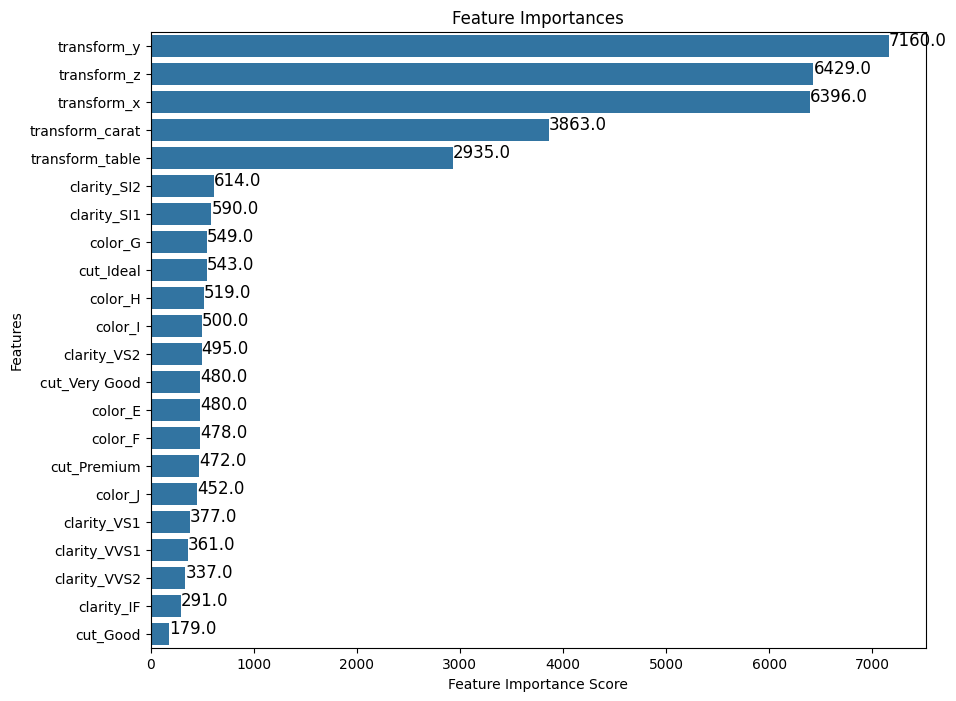

In [37]:
lgbm_model = LGBMRegressor(n_estimators=500, learning_rate=0.1, num_leaves=70, max_depth=-1, min_data_in_leaf=20, verbosity=-1, random_state=42)
lgbm_model.fit(X_train_selected_non_pca, y_train)

importances = lgbm_model.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train_selected_non_pca.columns, 'Importance Score': importances})
importances_df = importances_df.sort_values('Importance Score', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=importances_df, x='Importance Score', y='Feature')
for bar in ax.patches:
  ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width(), 2), fontsize=12)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

### 5.3 Evaluasi Perbandingan Data Hasil Prediksi terhadap Data Asli
- Untuk membuat perbandingannya dilakukan dengan menggunakan scatterplot dan lineplot dalam satu grafik.

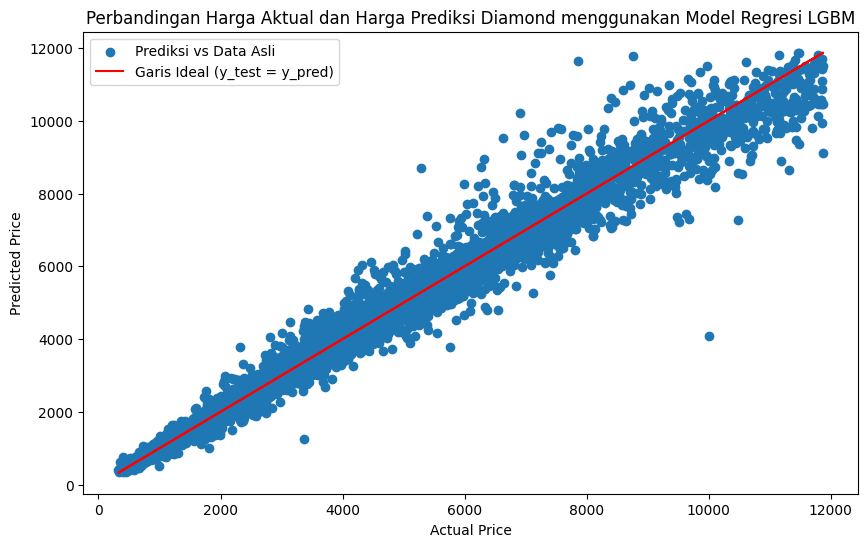

In [46]:
# Mempersiapkan data
price_transformer = power_transformers['price']
y_pred = lgbm_model.predict(X_test_selected_non_pca)
y_pred_inverse = price_transformer.inverse_transform(y_pred.reshape(-1, 1))
y_test_inverse = price_transformer.inverse_transform(y_test.values.reshape(-1, 1))

# Membuat Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_inverse.flatten(), y_pred_inverse.flatten(), label='Prediksi vs Data Asli')
plt.plot(y_test_inverse.flatten(), y_test_inverse.flatten(), color='red', label='Garis Ideal (y_test = y_pred)')
plt.legend()
plt.title('Perbandingan Harga Aktual dan Harga Prediksi Diamond menggunakan Model Regresi LGBM')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()

## 6. Deployment

In [58]:
# Simpan semua PowerTransformer per kolom
joblib.dump(power_transformers, 'power_transformers.joblib')

# Simpan OneHotEncoder
joblib.dump(encoder, 'onehot_encoder.joblib')

# Simpan model LightGBM
joblib.dump(lgbm_model, 'lgbm_model.joblib')

# Simpan daftar kolom final (tanpa PCA)
joblib.dump(X_train_selected_non_pca.columns.tolist(), 'final_feature_columns.joblib')

# Data Test
joblib.dump(X_test, 'X_test.joblib')
joblib.dump(y_test, 'y_test.joblib')

['y_test.joblib']

In [54]:
# 1. Load model dan preprocessing
lgbm_model = joblib.load('lgbm_model.joblib')
power_transformers = joblib.load('power_transformers.joblib')
encoder = joblib.load('onehot_encoder.joblib')
final_columns = joblib.load('final_feature_columns.joblib')

# 2. Input dari pengguna
input_data = pd.DataFrame([{
    'carat': 0.2,
    'cut': 'Premium',
    'color': 'J',
    'clarity': 'I1',
    'table': 59.0,
    'x': 10.9,
    'y': 5.1,
    'z': 9.3,
}])

# 3. PowerTransform untuk fitur numerik
numerical_features = ['carat', 'table', 'x', 'y', 'z']
for col in numerical_features:
    transformer = power_transformers[col]
    input_data[f'transform_{col}'] = transformer.transform(input_data[[col]])
input_data.drop(columns=numerical_features, inplace=True)

# 4. OneHotEncoder untuk fitur kategorikal
categorical_features = ['cut', 'color', 'clarity']
encoded = encoder.transform(input_data[categorical_features])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_features),
    index=input_data.index
)

# 5. Gabungkan hasil encode dan kolom lainnya
input_processed = encoded_df.join(input_data.drop(columns=categorical_features))

# 6. Lengkapi kolom agar sesuai urutan training
missing_cols = set(final_columns) - set(input_processed.columns)
for col in missing_cols:
    input_processed[col] = 0
input_processed = input_processed[final_columns]

# 7. Prediksi (dalam bentuk hasil transformasi)
pred_transformed = lgbm_model.predict(input_processed)

# 8. Inverse transform harga untuk mendapatkan nilai asli
price_original = price_transformer.inverse_transform(np.array(pred_transformed).reshape(-1, 1))

# 9. Tampilkan hasil
print(f"Predicted Price: ${price_original[0][0]:.2f}")

Predicted Price: $535.47


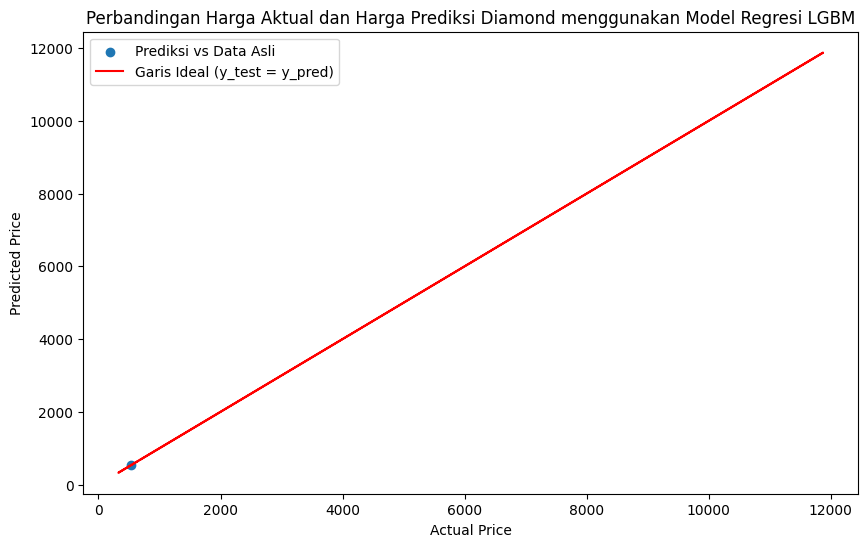

In [55]:
# Membuat Plot
plt.figure(figsize=(10, 6))
plt.scatter(price_original.flatten(), price_original.flatten(), label='Prediksi vs Data Asli')
plt.plot(y_test_inverse.flatten(), y_test_inverse.flatten(), color='red', label='Garis Ideal (y_test = y_pred)')
plt.legend()
plt.title('Perbandingan Harga Aktual dan Harga Prediksi Diamond menggunakan Model Regresi LGBM')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()